# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [35]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

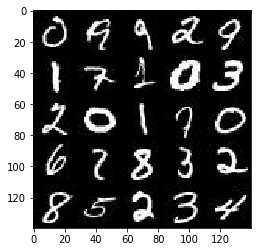

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

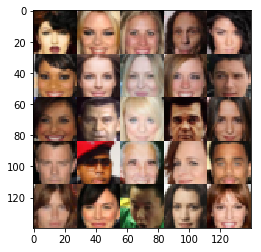

In [36]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [120]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    input_real = tf.placeholder(tf.float32, (None, image_height, image_width, image_channels), name="input_real")
    input_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    learning_rate = tf.placeholder(tf.float32, (None), name="learning_rate")
    
    
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [142]:
def discriminator(images, reuse=False, alpha=0.01):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    with tf.variable_scope('discriminator', reuse=reuse):
#         h1 = tf.reshape(images, (-1, 28*28*int(images.shape[-1])))
        
#         h1 = tf.layers.dense(h1, 1024, activation=None)
#         h1 = tf.maximum(alpha * h1, h1)
        
#         h2 = tf.layers.dense(h1, 512, activation=None)
#         h2 = tf.maximum(alpha * h2, h2)
        
#         logits = tf.layers.dense(h2, 1, activation=None)
#         out = tf.sigmoid(logits)
        
#         return out, logits

        size = 512
    
        x1 = tf.layers.conv2d(images, size/4, 5, strides=2, padding='same')
        x1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(x1, size/2, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        
        x3 = tf.layers.conv2d(x2, size, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        x3f = tf.reshape(x3, (-1, 4*4*size))
        
        logits = tf.layers.dense(x3f, 1)
        output = tf.sigmoid(logits)
        
        return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [149]:
def generator(z, out_channel_dim, is_train=True, alpha=0.01):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    with tf.variable_scope('generator', reuse=(not is_train)):
#         h1 = tf.layers.dense(z, 256, activation=None)
#         h1 = tf.maximum(alpha * h1, h1)
        
#         h2 = tf.layers.dense(h1, 512, activation=None)
#         h2 = tf.maximum(alpha * h2, h2)
        
#         # Logits and tanh output
#         logits = tf.layers.dense(h2, 28*28*out_channel_dim, activation=None)
#         out = tf.tanh(logits)
        
#         return tf.reshape(out, (-1, 28, 28, out_channel_dim))

        size = 512

        x1 = tf.layers.dense(z, 7*7*size)
        
        x1 = tf.reshape(x1, (-1, 7, 7, size))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d_transpose(x1, int(size/2), 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        
        x3 = tf.layers.conv2d_transpose(x2, int(size/4), 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        output = tf.tanh(logits) * 0.5
        
        return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [150]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.01):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    g_model = generator(input_z, out_channel_dim, is_train=True, alpha=alpha)
    
    d_model_real, d_logits_real = discriminator(input_real, reuse=False, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                labels=tf.ones_like(d_model_real) * (1 - 0.9)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [151]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    t_vars = tf.trainable_variables()
    
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, 
                                             beta1=beta1).minimize(d_loss, 
                                                                   var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, 
                                             beta1=beta1).minimize(g_loss, 
                                                                   var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [152]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.shape[-1]
    example_z = np.random.uniform(-1, 1, size=(n_images, z_dim))

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [153]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    
    losses = []
    batch_i = 0
    
    input_real, input_z, learn_rate = model_inputs(data_shape[2], data_shape[1], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3], alpha=0.01)
        
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_i = batch_i + 1
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, learn_rate: learning_rate})

                if batch_i % 1 == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{} - ".format(epoch_i, epochs),
                          "Discriminator loss: {:.4f} - ".format(train_loss_d),
                          "Generator loss: {:.4f} - ".format(train_loss_g),
                          "D + G loss: {:.4f}".format(train_loss_d + train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if batch_i % 20 == 0:
                    show_generator_output(sess, 16, input_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2 -  Discriminator loss: 0.8870 -  Generator loss: 2.6119 -  D + G loss: 3.4989
Epoch 0/2 -  Discriminator loss: 0.7927 -  Generator loss: 2.1485 -  D + G loss: 2.9412
Epoch 0/2 -  Discriminator loss: 0.5136 -  Generator loss: 2.6579 -  D + G loss: 3.1715
Epoch 0/2 -  Discriminator loss: 0.5074 -  Generator loss: 2.4002 -  D + G loss: 2.9077
Epoch 0/2 -  Discriminator loss: 0.5082 -  Generator loss: 4.5209 -  D + G loss: 5.0291
Epoch 0/2 -  Discriminator loss: 0.4353 -  Generator loss: 2.6208 -  D + G loss: 3.0560
Epoch 0/2 -  Discriminator loss: 0.3923 -  Generator loss: 4.3161 -  D + G loss: 4.7084
Epoch 0/2 -  Discriminator loss: 0.5312 -  Generator loss: 2.4142 -  D + G loss: 2.9453
Epoch 0/2 -  Discriminator loss: 0.6912 -  Generator loss: 6.3906 -  D + G loss: 7.0818
Epoch 0/2 -  Discriminator loss: 0.4058 -  Generator loss: 3.8784 -  D + G loss: 4.2842
Epoch 0/2 -  Discriminator loss: 0.6339 -  Generator loss: 2.2297 -  D + G loss: 2.8636
Epoch 0/2 -  Discriminator loss:

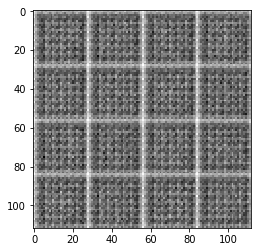

Epoch 0/2 -  Discriminator loss: 0.3783 -  Generator loss: 5.2591 -  D + G loss: 5.6374
Epoch 0/2 -  Discriminator loss: 0.5297 -  Generator loss: 2.8525 -  D + G loss: 3.3822
Epoch 0/2 -  Discriminator loss: 0.9989 -  Generator loss: 9.9771 -  D + G loss: 10.9759
Epoch 0/2 -  Discriminator loss: 0.6944 -  Generator loss: 7.0059 -  D + G loss: 7.7002
Epoch 0/2 -  Discriminator loss: 0.4204 -  Generator loss: 3.6580 -  D + G loss: 4.0784
Epoch 0/2 -  Discriminator loss: 0.4306 -  Generator loss: 2.8349 -  D + G loss: 3.2655
Epoch 0/2 -  Discriminator loss: 0.4997 -  Generator loss: 6.3291 -  D + G loss: 6.8289
Epoch 0/2 -  Discriminator loss: 0.4049 -  Generator loss: 3.1310 -  D + G loss: 3.5359
Epoch 0/2 -  Discriminator loss: 0.3931 -  Generator loss: 5.1222 -  D + G loss: 5.5153
Epoch 0/2 -  Discriminator loss: 0.4267 -  Generator loss: 3.2895 -  D + G loss: 3.7163
Epoch 0/2 -  Discriminator loss: 0.6243 -  Generator loss: 7.4125 -  D + G loss: 8.0368
Epoch 0/2 -  Discriminator loss

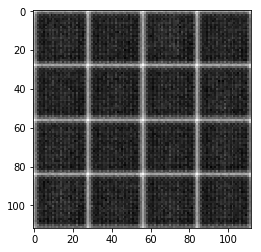

Epoch 0/2 -  Discriminator loss: 0.7295 -  Generator loss: 8.8384 -  D + G loss: 9.5679
Epoch 0/2 -  Discriminator loss: 0.4392 -  Generator loss: 5.6835 -  D + G loss: 6.1228
Epoch 0/2 -  Discriminator loss: 0.4552 -  Generator loss: 2.8142 -  D + G loss: 3.2695
Epoch 0/2 -  Discriminator loss: 0.5842 -  Generator loss: 7.1470 -  D + G loss: 7.7312
Epoch 0/2 -  Discriminator loss: 0.3734 -  Generator loss: 3.8206 -  D + G loss: 4.1940
Epoch 0/2 -  Discriminator loss: 0.4249 -  Generator loss: 2.6676 -  D + G loss: 3.0925
Epoch 0/2 -  Discriminator loss: 0.5176 -  Generator loss: 6.4261 -  D + G loss: 6.9437
Epoch 0/2 -  Discriminator loss: 0.3774 -  Generator loss: 3.3772 -  D + G loss: 3.7546
Epoch 0/2 -  Discriminator loss: 0.3767 -  Generator loss: 3.3274 -  D + G loss: 3.7040
Epoch 0/2 -  Discriminator loss: 0.3727 -  Generator loss: 3.7571 -  D + G loss: 4.1299
Epoch 0/2 -  Discriminator loss: 0.4129 -  Generator loss: 2.7622 -  D + G loss: 3.1751
Epoch 0/2 -  Discriminator loss:

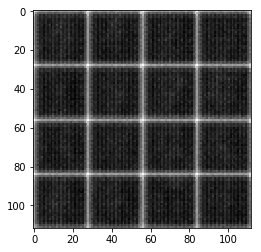

Epoch 0/2 -  Discriminator loss: 0.6260 -  Generator loss: 6.6822 -  D + G loss: 7.3082
Epoch 0/2 -  Discriminator loss: 0.3904 -  Generator loss: 3.9573 -  D + G loss: 4.3478
Epoch 0/2 -  Discriminator loss: 0.5561 -  Generator loss: 2.0337 -  D + G loss: 2.5898
Epoch 0/2 -  Discriminator loss: 0.6848 -  Generator loss: 7.2310 -  D + G loss: 7.9158
Epoch 0/2 -  Discriminator loss: 0.4384 -  Generator loss: 4.5766 -  D + G loss: 5.0150
Epoch 0/2 -  Discriminator loss: 0.4965 -  Generator loss: 2.3079 -  D + G loss: 2.8044
Epoch 0/2 -  Discriminator loss: 0.4730 -  Generator loss: 5.0622 -  D + G loss: 5.5352
Epoch 0/2 -  Discriminator loss: 0.4186 -  Generator loss: 2.7700 -  D + G loss: 3.1886
Epoch 0/2 -  Discriminator loss: 0.3878 -  Generator loss: 3.6274 -  D + G loss: 4.0152
Epoch 0/2 -  Discriminator loss: 0.4243 -  Generator loss: 2.5770 -  D + G loss: 3.0012
Epoch 0/2 -  Discriminator loss: 0.3970 -  Generator loss: 3.7466 -  D + G loss: 4.1436
Epoch 0/2 -  Discriminator loss:

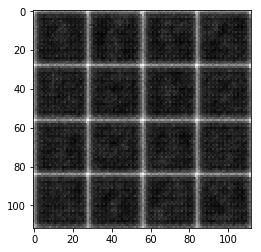

Epoch 0/2 -  Discriminator loss: 0.4005 -  Generator loss: 2.8350 -  D + G loss: 3.2355
Epoch 0/2 -  Discriminator loss: 0.3919 -  Generator loss: 3.5625 -  D + G loss: 3.9543
Epoch 0/2 -  Discriminator loss: 0.4418 -  Generator loss: 2.4380 -  D + G loss: 2.8798
Epoch 0/2 -  Discriminator loss: 0.5248 -  Generator loss: 5.6160 -  D + G loss: 6.1408
Epoch 0/2 -  Discriminator loss: 0.3995 -  Generator loss: 2.9333 -  D + G loss: 3.3329
Epoch 0/2 -  Discriminator loss: 0.3932 -  Generator loss: 3.2792 -  D + G loss: 3.6724
Epoch 0/2 -  Discriminator loss: 0.3904 -  Generator loss: 2.9644 -  D + G loss: 3.3548
Epoch 0/2 -  Discriminator loss: 0.3822 -  Generator loss: 3.2756 -  D + G loss: 3.6577
Epoch 0/2 -  Discriminator loss: 0.3805 -  Generator loss: 3.1525 -  D + G loss: 3.5330
Epoch 0/2 -  Discriminator loss: 0.3763 -  Generator loss: 3.3713 -  D + G loss: 3.7476
Epoch 0/2 -  Discriminator loss: 0.3929 -  Generator loss: 2.9117 -  D + G loss: 3.3046
Epoch 0/2 -  Discriminator loss:

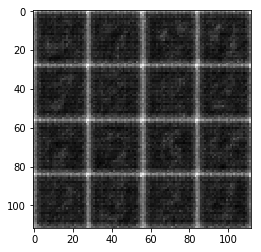

Epoch 0/2 -  Discriminator loss: 0.4378 -  Generator loss: 2.5958 -  D + G loss: 3.0336
Epoch 0/2 -  Discriminator loss: 0.4489 -  Generator loss: 4.6547 -  D + G loss: 5.1036
Epoch 0/2 -  Discriminator loss: 0.4419 -  Generator loss: 2.4216 -  D + G loss: 2.8635
Epoch 0/2 -  Discriminator loss: 0.4750 -  Generator loss: 4.8866 -  D + G loss: 5.3616
Epoch 0/2 -  Discriminator loss: 0.4206 -  Generator loss: 2.6264 -  D + G loss: 3.0470
Epoch 0/2 -  Discriminator loss: 0.4299 -  Generator loss: 4.4854 -  D + G loss: 4.9153
Epoch 0/2 -  Discriminator loss: 0.4461 -  Generator loss: 2.4183 -  D + G loss: 2.8644
Epoch 0/2 -  Discriminator loss: 0.4928 -  Generator loss: 5.2034 -  D + G loss: 5.6963
Epoch 0/2 -  Discriminator loss: 0.4096 -  Generator loss: 2.7891 -  D + G loss: 3.1986
Epoch 0/2 -  Discriminator loss: 0.3883 -  Generator loss: 3.5377 -  D + G loss: 3.9261
Epoch 0/2 -  Discriminator loss: 0.3978 -  Generator loss: 2.8154 -  D + G loss: 3.2132
Epoch 0/2 -  Discriminator loss:

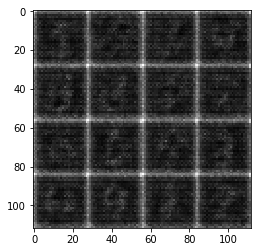

Epoch 0/2 -  Discriminator loss: 0.4657 -  Generator loss: 4.8791 -  D + G loss: 5.3448
Epoch 0/2 -  Discriminator loss: 0.4163 -  Generator loss: 2.7011 -  D + G loss: 3.1175
Epoch 0/2 -  Discriminator loss: 0.4191 -  Generator loss: 4.0054 -  D + G loss: 4.4245
Epoch 0/2 -  Discriminator loss: 0.4420 -  Generator loss: 2.3789 -  D + G loss: 2.8209
Epoch 0/2 -  Discriminator loss: 0.5114 -  Generator loss: 5.4004 -  D + G loss: 5.9118
Epoch 0/2 -  Discriminator loss: 0.3938 -  Generator loss: 3.0804 -  D + G loss: 3.4742
Epoch 0/2 -  Discriminator loss: 0.3877 -  Generator loss: 3.1031 -  D + G loss: 3.4908
Epoch 0/2 -  Discriminator loss: 0.3808 -  Generator loss: 3.2383 -  D + G loss: 3.6192
Epoch 0/2 -  Discriminator loss: 0.3859 -  Generator loss: 3.0133 -  D + G loss: 3.3992
Epoch 0/2 -  Discriminator loss: 0.3826 -  Generator loss: 3.4964 -  D + G loss: 3.8790
Epoch 0/2 -  Discriminator loss: 0.4029 -  Generator loss: 2.7673 -  D + G loss: 3.1701
Epoch 0/2 -  Discriminator loss:

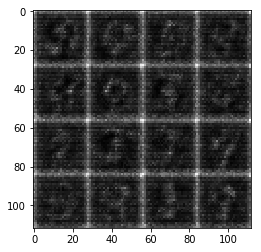

Epoch 0/2 -  Discriminator loss: 0.4009 -  Generator loss: 2.8155 -  D + G loss: 3.2164
Epoch 0/2 -  Discriminator loss: 0.3819 -  Generator loss: 3.5355 -  D + G loss: 3.9174
Epoch 0/2 -  Discriminator loss: 0.4084 -  Generator loss: 2.7040 -  D + G loss: 3.1124
Epoch 0/2 -  Discriminator loss: 0.4056 -  Generator loss: 4.0955 -  D + G loss: 4.5011
Epoch 0/2 -  Discriminator loss: 0.4293 -  Generator loss: 2.5259 -  D + G loss: 2.9552
Epoch 0/2 -  Discriminator loss: 0.4639 -  Generator loss: 4.9033 -  D + G loss: 5.3673
Epoch 0/2 -  Discriminator loss: 0.4081 -  Generator loss: 2.7045 -  D + G loss: 3.1126
Epoch 0/2 -  Discriminator loss: 0.3856 -  Generator loss: 3.5822 -  D + G loss: 3.9678
Epoch 0/2 -  Discriminator loss: 0.3967 -  Generator loss: 2.8443 -  D + G loss: 3.2410
Epoch 0/2 -  Discriminator loss: 0.3997 -  Generator loss: 3.9893 -  D + G loss: 4.3891
Epoch 0/2 -  Discriminator loss: 0.4446 -  Generator loss: 2.4250 -  D + G loss: 2.8696
Epoch 0/2 -  Discriminator loss:

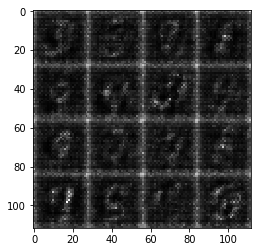

Epoch 0/2 -  Discriminator loss: 0.3939 -  Generator loss: 2.9446 -  D + G loss: 3.3385
Epoch 0/2 -  Discriminator loss: 0.3786 -  Generator loss: 3.5328 -  D + G loss: 3.9114
Epoch 0/2 -  Discriminator loss: 0.3850 -  Generator loss: 3.0052 -  D + G loss: 3.3903
Epoch 0/2 -  Discriminator loss: 0.3859 -  Generator loss: 3.9489 -  D + G loss: 4.3348
Epoch 0/2 -  Discriminator loss: 0.4209 -  Generator loss: 2.6195 -  D + G loss: 3.0404
Epoch 0/2 -  Discriminator loss: 0.4741 -  Generator loss: 5.1995 -  D + G loss: 5.6736
Epoch 0/2 -  Discriminator loss: 0.4010 -  Generator loss: 2.9410 -  D + G loss: 3.3420
Epoch 0/2 -  Discriminator loss: 0.3834 -  Generator loss: 3.6056 -  D + G loss: 3.9890
Epoch 0/2 -  Discriminator loss: 0.3908 -  Generator loss: 2.9483 -  D + G loss: 3.3390
Epoch 0/2 -  Discriminator loss: 0.3906 -  Generator loss: 3.9242 -  D + G loss: 4.3148
Epoch 0/2 -  Discriminator loss: 0.4166 -  Generator loss: 2.6323 -  D + G loss: 3.0489
Epoch 0/2 -  Discriminator loss:

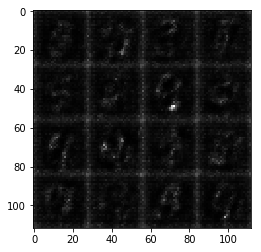

Epoch 0/2 -  Discriminator loss: 0.3950 -  Generator loss: 4.1664 -  D + G loss: 4.5614
Epoch 0/2 -  Discriminator loss: 0.4245 -  Generator loss: 2.5835 -  D + G loss: 3.0080
Epoch 0/2 -  Discriminator loss: 0.4469 -  Generator loss: 4.8467 -  D + G loss: 5.2936
Epoch 0/2 -  Discriminator loss: 0.4010 -  Generator loss: 2.7931 -  D + G loss: 3.1940
Epoch 0/2 -  Discriminator loss: 0.4012 -  Generator loss: 4.1661 -  D + G loss: 4.5673
Epoch 0/2 -  Discriminator loss: 0.4104 -  Generator loss: 2.7233 -  D + G loss: 3.1337
Epoch 0/2 -  Discriminator loss: 0.4056 -  Generator loss: 4.2278 -  D + G loss: 4.6333
Epoch 0/2 -  Discriminator loss: 0.4039 -  Generator loss: 2.8001 -  D + G loss: 3.2040
Epoch 0/2 -  Discriminator loss: 0.4174 -  Generator loss: 4.5027 -  D + G loss: 4.9201
Epoch 0/2 -  Discriminator loss: 0.4192 -  Generator loss: 2.6950 -  D + G loss: 3.1142
Epoch 0/2 -  Discriminator loss: 0.4096 -  Generator loss: 4.2714 -  D + G loss: 4.6810
Epoch 0/2 -  Discriminator loss:

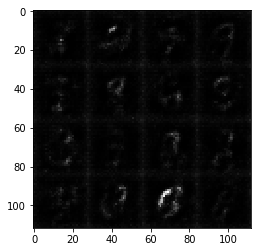

Epoch 0/2 -  Discriminator loss: 0.4123 -  Generator loss: 4.3025 -  D + G loss: 4.7147
Epoch 0/2 -  Discriminator loss: 0.4167 -  Generator loss: 2.6543 -  D + G loss: 3.0711
Epoch 0/2 -  Discriminator loss: 0.4261 -  Generator loss: 4.6691 -  D + G loss: 5.0952
Epoch 0/2 -  Discriminator loss: 0.4088 -  Generator loss: 2.8120 -  D + G loss: 3.2208
Epoch 0/2 -  Discriminator loss: 0.4092 -  Generator loss: 4.4312 -  D + G loss: 4.8405
Epoch 0/2 -  Discriminator loss: 0.3986 -  Generator loss: 2.8605 -  D + G loss: 3.2592
Epoch 0/2 -  Discriminator loss: 0.4149 -  Generator loss: 4.6571 -  D + G loss: 5.0720
Epoch 0/2 -  Discriminator loss: 0.4035 -  Generator loss: 2.8343 -  D + G loss: 3.2378
Epoch 0/2 -  Discriminator loss: 0.4005 -  Generator loss: 4.2831 -  D + G loss: 4.6836
Epoch 0/2 -  Discriminator loss: 0.4034 -  Generator loss: 2.8073 -  D + G loss: 3.2107
Epoch 0/2 -  Discriminator loss: 0.3979 -  Generator loss: 4.2156 -  D + G loss: 4.6135
Epoch 0/2 -  Discriminator loss:

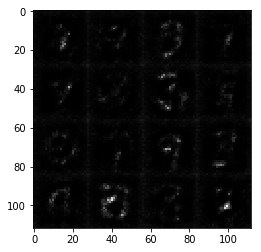

Epoch 0/2 -  Discriminator loss: 0.4049 -  Generator loss: 4.4716 -  D + G loss: 4.8765
Epoch 0/2 -  Discriminator loss: 0.4017 -  Generator loss: 2.8350 -  D + G loss: 3.2367
Epoch 0/2 -  Discriminator loss: 0.3930 -  Generator loss: 4.3558 -  D + G loss: 4.7488
Epoch 0/2 -  Discriminator loss: 0.4004 -  Generator loss: 2.9244 -  D + G loss: 3.3248
Epoch 0/2 -  Discriminator loss: 0.4013 -  Generator loss: 4.2693 -  D + G loss: 4.6705
Epoch 0/2 -  Discriminator loss: 0.3949 -  Generator loss: 2.9299 -  D + G loss: 3.3248
Epoch 0/2 -  Discriminator loss: 0.3891 -  Generator loss: 4.1702 -  D + G loss: 4.5593
Epoch 0/2 -  Discriminator loss: 0.3923 -  Generator loss: 2.9541 -  D + G loss: 3.3463
Epoch 0/2 -  Discriminator loss: 0.4019 -  Generator loss: 4.2891 -  D + G loss: 4.6911
Epoch 0/2 -  Discriminator loss: 0.4027 -  Generator loss: 2.8611 -  D + G loss: 3.2638
Epoch 0/2 -  Discriminator loss: 0.4075 -  Generator loss: 4.3797 -  D + G loss: 4.7872
Epoch 0/2 -  Discriminator loss:

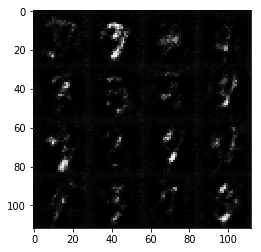

Epoch 0/2 -  Discriminator loss: 0.3909 -  Generator loss: 4.3028 -  D + G loss: 4.6937
Epoch 0/2 -  Discriminator loss: 0.3978 -  Generator loss: 2.8998 -  D + G loss: 3.2976
Epoch 0/2 -  Discriminator loss: 0.3998 -  Generator loss: 4.5832 -  D + G loss: 4.9830
Epoch 0/2 -  Discriminator loss: 0.3982 -  Generator loss: 2.9009 -  D + G loss: 3.2991
Epoch 0/2 -  Discriminator loss: 0.4065 -  Generator loss: 4.4664 -  D + G loss: 4.8729
Epoch 0/2 -  Discriminator loss: 0.4028 -  Generator loss: 2.8402 -  D + G loss: 3.2430
Epoch 0/2 -  Discriminator loss: 0.4136 -  Generator loss: 4.4859 -  D + G loss: 4.8995
Epoch 0/2 -  Discriminator loss: 0.3909 -  Generator loss: 3.0266 -  D + G loss: 3.4175
Epoch 0/2 -  Discriminator loss: 0.3982 -  Generator loss: 4.2354 -  D + G loss: 4.6336
Epoch 0/2 -  Discriminator loss: 0.4023 -  Generator loss: 2.8758 -  D + G loss: 3.2781
Epoch 0/2 -  Discriminator loss: 0.4018 -  Generator loss: 4.3775 -  D + G loss: 4.7793
Epoch 0/2 -  Discriminator loss:

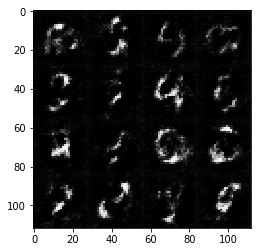

Epoch 0/2 -  Discriminator loss: 0.3958 -  Generator loss: 4.3075 -  D + G loss: 4.7033
Epoch 0/2 -  Discriminator loss: 0.3958 -  Generator loss: 2.9404 -  D + G loss: 3.3362
Epoch 0/2 -  Discriminator loss: 0.3951 -  Generator loss: 4.3140 -  D + G loss: 4.7091
Epoch 0/2 -  Discriminator loss: 0.4253 -  Generator loss: 2.8526 -  D + G loss: 3.2779
Epoch 0/2 -  Discriminator loss: 0.4523 -  Generator loss: 5.1096 -  D + G loss: 5.5619
Epoch 0/2 -  Discriminator loss: 0.3987 -  Generator loss: 3.1857 -  D + G loss: 3.5844
Epoch 0/2 -  Discriminator loss: 0.3710 -  Generator loss: 3.8335 -  D + G loss: 4.2045
Epoch 0/2 -  Discriminator loss: 0.3788 -  Generator loss: 3.1678 -  D + G loss: 3.5465
Epoch 0/2 -  Discriminator loss: 0.3798 -  Generator loss: 3.9582 -  D + G loss: 4.3380
Epoch 0/2 -  Discriminator loss: 0.3924 -  Generator loss: 2.9587 -  D + G loss: 3.3512
Epoch 0/2 -  Discriminator loss: 0.3864 -  Generator loss: 4.1672 -  D + G loss: 4.5536
Epoch 0/2 -  Discriminator loss:

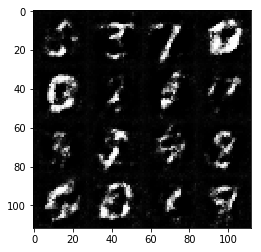

Epoch 0/2 -  Discriminator loss: 0.3920 -  Generator loss: 4.2764 -  D + G loss: 4.6684
Epoch 0/2 -  Discriminator loss: 0.4012 -  Generator loss: 2.8901 -  D + G loss: 3.2913
Epoch 0/2 -  Discriminator loss: 0.4226 -  Generator loss: 4.8230 -  D + G loss: 5.2457
Epoch 0/2 -  Discriminator loss: 0.3898 -  Generator loss: 3.0241 -  D + G loss: 3.4139
Epoch 0/2 -  Discriminator loss: 0.3689 -  Generator loss: 3.6792 -  D + G loss: 4.0481
Epoch 0/2 -  Discriminator loss: 0.3702 -  Generator loss: 3.3001 -  D + G loss: 3.6702
Epoch 0/2 -  Discriminator loss: 0.3684 -  Generator loss: 3.5304 -  D + G loss: 3.8988
Epoch 0/2 -  Discriminator loss: 0.3725 -  Generator loss: 3.2179 -  D + G loss: 3.5904
Epoch 0/2 -  Discriminator loss: 0.3672 -  Generator loss: 3.6290 -  D + G loss: 3.9962
Epoch 0/2 -  Discriminator loss: 0.3706 -  Generator loss: 3.2758 -  D + G loss: 3.6464
Epoch 0/2 -  Discriminator loss: 0.3670 -  Generator loss: 3.6947 -  D + G loss: 4.0617
Epoch 0/2 -  Discriminator loss:

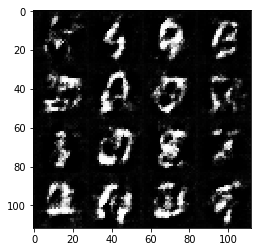

Epoch 0/2 -  Discriminator loss: 0.3895 -  Generator loss: 4.4902 -  D + G loss: 4.8797
Epoch 0/2 -  Discriminator loss: 0.3941 -  Generator loss: 2.9858 -  D + G loss: 3.3798
Epoch 0/2 -  Discriminator loss: 0.3863 -  Generator loss: 4.3295 -  D + G loss: 4.7158
Epoch 0/2 -  Discriminator loss: 0.3867 -  Generator loss: 3.1052 -  D + G loss: 3.4919
Epoch 0/2 -  Discriminator loss: 0.3864 -  Generator loss: 4.2015 -  D + G loss: 4.5879
Epoch 0/2 -  Discriminator loss: 0.3992 -  Generator loss: 2.8939 -  D + G loss: 3.2931
Epoch 0/2 -  Discriminator loss: 0.3938 -  Generator loss: 4.3030 -  D + G loss: 4.6968
Epoch 0/2 -  Discriminator loss: 0.3967 -  Generator loss: 2.9637 -  D + G loss: 3.3604
Epoch 0/2 -  Discriminator loss: 0.4126 -  Generator loss: 4.7149 -  D + G loss: 5.1275
Epoch 0/2 -  Discriminator loss: 0.3920 -  Generator loss: 3.0827 -  D + G loss: 3.4747
Epoch 0/2 -  Discriminator loss: 0.3721 -  Generator loss: 3.9940 -  D + G loss: 4.3661
Epoch 0/2 -  Discriminator loss:

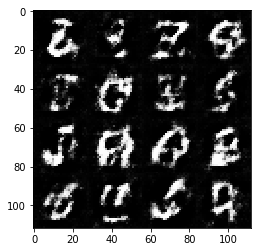

Epoch 0/2 -  Discriminator loss: 0.3892 -  Generator loss: 4.4104 -  D + G loss: 4.7996
Epoch 0/2 -  Discriminator loss: 0.3958 -  Generator loss: 3.0326 -  D + G loss: 3.4284
Epoch 0/2 -  Discriminator loss: 0.4218 -  Generator loss: 4.8914 -  D + G loss: 5.3131
Epoch 0/2 -  Discriminator loss: 0.3848 -  Generator loss: 3.1576 -  D + G loss: 3.5424
Epoch 0/2 -  Discriminator loss: 0.3785 -  Generator loss: 4.1478 -  D + G loss: 4.5263
Epoch 0/2 -  Discriminator loss: 0.3987 -  Generator loss: 2.9125 -  D + G loss: 3.3112
Epoch 0/2 -  Discriminator loss: 0.3894 -  Generator loss: 4.3166 -  D + G loss: 4.7060
Epoch 0/2 -  Discriminator loss: 0.3856 -  Generator loss: 3.1033 -  D + G loss: 3.4889
Epoch 0/2 -  Discriminator loss: 0.3780 -  Generator loss: 4.0177 -  D + G loss: 4.3956
Epoch 0/2 -  Discriminator loss: 0.3927 -  Generator loss: 2.9580 -  D + G loss: 3.3506
Epoch 0/2 -  Discriminator loss: 0.3858 -  Generator loss: 4.0872 -  D + G loss: 4.4730
Epoch 0/2 -  Discriminator loss:

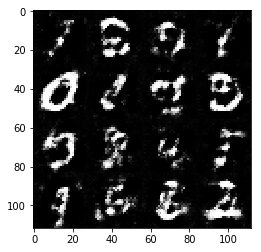

Epoch 0/2 -  Discriminator loss: 0.4018 -  Generator loss: 4.3958 -  D + G loss: 4.7976
Epoch 0/2 -  Discriminator loss: 0.3889 -  Generator loss: 3.1164 -  D + G loss: 3.5053
Epoch 0/2 -  Discriminator loss: 0.3704 -  Generator loss: 3.9528 -  D + G loss: 4.3232
Epoch 0/2 -  Discriminator loss: 0.3807 -  Generator loss: 3.1208 -  D + G loss: 3.5014
Epoch 0/2 -  Discriminator loss: 0.3730 -  Generator loss: 4.1165 -  D + G loss: 4.4896
Epoch 0/2 -  Discriminator loss: 0.3830 -  Generator loss: 3.0660 -  D + G loss: 3.4490
Epoch 0/2 -  Discriminator loss: 0.3675 -  Generator loss: 3.8062 -  D + G loss: 4.1737
Epoch 0/2 -  Discriminator loss: 0.3764 -  Generator loss: 3.2012 -  D + G loss: 3.5776
Epoch 0/2 -  Discriminator loss: 0.3735 -  Generator loss: 3.9220 -  D + G loss: 4.2955
Epoch 0/2 -  Discriminator loss: 0.3773 -  Generator loss: 3.1605 -  D + G loss: 3.5378
Epoch 0/2 -  Discriminator loss: 0.3700 -  Generator loss: 4.0373 -  D + G loss: 4.4073
Epoch 0/2 -  Discriminator loss:

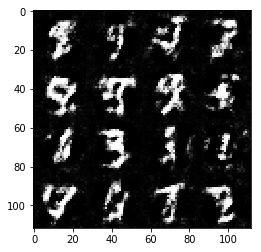

Epoch 0/2 -  Discriminator loss: 0.3834 -  Generator loss: 4.0227 -  D + G loss: 4.4061
Epoch 0/2 -  Discriminator loss: 0.3888 -  Generator loss: 3.0294 -  D + G loss: 3.4183
Epoch 0/2 -  Discriminator loss: 0.3797 -  Generator loss: 4.1230 -  D + G loss: 4.5026
Epoch 0/2 -  Discriminator loss: 0.3976 -  Generator loss: 2.9035 -  D + G loss: 3.3011
Epoch 0/2 -  Discriminator loss: 0.3997 -  Generator loss: 4.3886 -  D + G loss: 4.7883
Epoch 0/2 -  Discriminator loss: 0.3972 -  Generator loss: 2.9713 -  D + G loss: 3.3685
Epoch 0/2 -  Discriminator loss: 0.4142 -  Generator loss: 4.7862 -  D + G loss: 5.2004
Epoch 0/2 -  Discriminator loss: 0.3922 -  Generator loss: 3.0638 -  D + G loss: 3.4560
Epoch 0/2 -  Discriminator loss: 0.3901 -  Generator loss: 4.2519 -  D + G loss: 4.6419
Epoch 0/2 -  Discriminator loss: 0.3910 -  Generator loss: 3.0338 -  D + G loss: 3.4248
Epoch 0/2 -  Discriminator loss: 0.3930 -  Generator loss: 4.6015 -  D + G loss: 4.9945
Epoch 0/2 -  Discriminator loss:

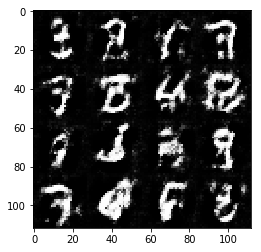

Epoch 0/2 -  Discriminator loss: 0.4400 -  Generator loss: 4.9099 -  D + G loss: 5.3499
Epoch 0/2 -  Discriminator loss: 0.3860 -  Generator loss: 3.1165 -  D + G loss: 3.5025
Epoch 0/2 -  Discriminator loss: 0.3727 -  Generator loss: 3.7145 -  D + G loss: 4.0872
Epoch 0/2 -  Discriminator loss: 0.3729 -  Generator loss: 3.2666 -  D + G loss: 3.6395
Epoch 0/2 -  Discriminator loss: 0.3651 -  Generator loss: 3.6111 -  D + G loss: 3.9762
Epoch 0/2 -  Discriminator loss: 0.3628 -  Generator loss: 3.4641 -  D + G loss: 3.8268
Epoch 0/2 -  Discriminator loss: 0.3661 -  Generator loss: 3.4000 -  D + G loss: 3.7661
Epoch 0/2 -  Discriminator loss: 0.3741 -  Generator loss: 3.1972 -  D + G loss: 3.5713
Epoch 0/2 -  Discriminator loss: 0.3682 -  Generator loss: 3.8765 -  D + G loss: 4.2447
Epoch 0/2 -  Discriminator loss: 0.3756 -  Generator loss: 3.1842 -  D + G loss: 3.5598
Epoch 0/2 -  Discriminator loss: 0.3697 -  Generator loss: 3.8007 -  D + G loss: 4.1704
Epoch 0/2 -  Discriminator loss:

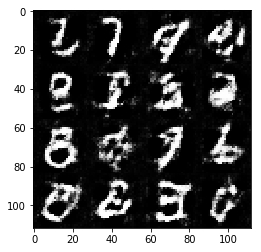

Epoch 0/2 -  Discriminator loss: 0.3835 -  Generator loss: 4.0314 -  D + G loss: 4.4150
Epoch 0/2 -  Discriminator loss: 0.4015 -  Generator loss: 2.8710 -  D + G loss: 3.2725
Epoch 0/2 -  Discriminator loss: 0.4165 -  Generator loss: 4.7238 -  D + G loss: 5.1403
Epoch 0/2 -  Discriminator loss: 0.4025 -  Generator loss: 2.9632 -  D + G loss: 3.3656
Epoch 0/2 -  Discriminator loss: 0.3951 -  Generator loss: 4.3722 -  D + G loss: 4.7672
Epoch 0/2 -  Discriminator loss: 0.3994 -  Generator loss: 2.9327 -  D + G loss: 3.3320
Epoch 0/2 -  Discriminator loss: 0.4076 -  Generator loss: 4.7227 -  D + G loss: 5.1303
Epoch 0/2 -  Discriminator loss: 0.3976 -  Generator loss: 2.9551 -  D + G loss: 3.3527
Epoch 0/2 -  Discriminator loss: 0.3866 -  Generator loss: 3.9297 -  D + G loss: 4.3163
Epoch 0/2 -  Discriminator loss: 0.3983 -  Generator loss: 2.8956 -  D + G loss: 3.2939
Epoch 0/2 -  Discriminator loss: 0.3906 -  Generator loss: 4.1818 -  D + G loss: 4.5724
Epoch 0/2 -  Discriminator loss:

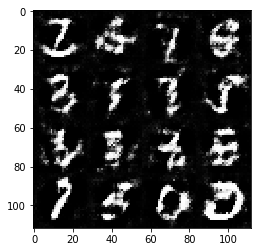

Epoch 0/2 -  Discriminator loss: 0.4285 -  Generator loss: 4.7261 -  D + G loss: 5.1546
Epoch 0/2 -  Discriminator loss: 0.3909 -  Generator loss: 2.9984 -  D + G loss: 3.3894
Epoch 0/2 -  Discriminator loss: 0.3803 -  Generator loss: 3.8805 -  D + G loss: 4.2609
Epoch 0/2 -  Discriminator loss: 0.3951 -  Generator loss: 2.9070 -  D + G loss: 3.3021
Epoch 0/2 -  Discriminator loss: 0.3888 -  Generator loss: 4.0934 -  D + G loss: 4.4822
Epoch 0/2 -  Discriminator loss: 0.3991 -  Generator loss: 2.9483 -  D + G loss: 3.3474
Epoch 0/2 -  Discriminator loss: 0.4014 -  Generator loss: 4.5345 -  D + G loss: 4.9360
Epoch 0/2 -  Discriminator loss: 0.3942 -  Generator loss: 2.9839 -  D + G loss: 3.3781
Epoch 0/2 -  Discriminator loss: 0.3853 -  Generator loss: 3.7243 -  D + G loss: 4.1096
Epoch 0/2 -  Discriminator loss: 0.3800 -  Generator loss: 3.0709 -  D + G loss: 3.4508
Epoch 0/2 -  Discriminator loss: 0.3705 -  Generator loss: 3.7351 -  D + G loss: 4.1056
Epoch 0/2 -  Discriminator loss:

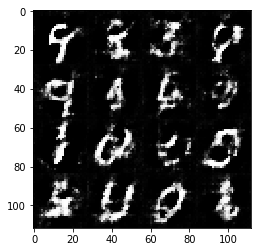

Epoch 0/2 -  Discriminator loss: 0.4044 -  Generator loss: 4.5563 -  D + G loss: 4.9607
Epoch 0/2 -  Discriminator loss: 0.4119 -  Generator loss: 2.7798 -  D + G loss: 3.1917
Epoch 0/2 -  Discriminator loss: 0.4098 -  Generator loss: 4.2896 -  D + G loss: 4.6994
Epoch 0/2 -  Discriminator loss: 0.4056 -  Generator loss: 2.8109 -  D + G loss: 3.2166
Epoch 0/2 -  Discriminator loss: 0.4048 -  Generator loss: 4.2618 -  D + G loss: 4.6666
Epoch 0/2 -  Discriminator loss: 0.4038 -  Generator loss: 2.8622 -  D + G loss: 3.2660
Epoch 0/2 -  Discriminator loss: 0.4095 -  Generator loss: 4.4464 -  D + G loss: 4.8558
Epoch 0/2 -  Discriminator loss: 0.3984 -  Generator loss: 2.8949 -  D + G loss: 3.2934
Epoch 0/2 -  Discriminator loss: 0.3978 -  Generator loss: 4.1334 -  D + G loss: 4.5312
Epoch 0/2 -  Discriminator loss: 0.3990 -  Generator loss: 2.8552 -  D + G loss: 3.2542
Epoch 0/2 -  Discriminator loss: 0.3882 -  Generator loss: 4.1285 -  D + G loss: 4.5167
Epoch 0/2 -  Discriminator loss:

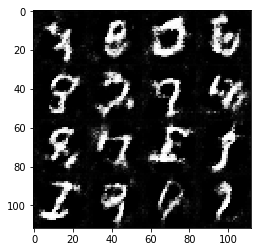

Epoch 0/2 -  Discriminator loss: 0.4050 -  Generator loss: 4.5580 -  D + G loss: 4.9631
Epoch 0/2 -  Discriminator loss: 0.3960 -  Generator loss: 2.9516 -  D + G loss: 3.3476
Epoch 0/2 -  Discriminator loss: 0.3826 -  Generator loss: 4.0342 -  D + G loss: 4.4168
Epoch 0/2 -  Discriminator loss: 0.3990 -  Generator loss: 2.8151 -  D + G loss: 3.2141
Epoch 0/2 -  Discriminator loss: 0.3828 -  Generator loss: 3.7196 -  D + G loss: 4.1024
Epoch 0/2 -  Discriminator loss: 0.3931 -  Generator loss: 2.8794 -  D + G loss: 3.2726
Epoch 0/2 -  Discriminator loss: 0.3900 -  Generator loss: 4.0576 -  D + G loss: 4.4475
Epoch 0/2 -  Discriminator loss: 0.4111 -  Generator loss: 2.7103 -  D + G loss: 3.1214
Epoch 1/2 -  Discriminator loss: 0.4078 -  Generator loss: 4.3071 -  D + G loss: 4.7149
Epoch 1/2 -  Discriminator loss: 0.3980 -  Generator loss: 2.8942 -  D + G loss: 3.2923
Epoch 1/2 -  Discriminator loss: 0.3845 -  Generator loss: 4.0257 -  D + G loss: 4.4102
Epoch 1/2 -  Discriminator loss:

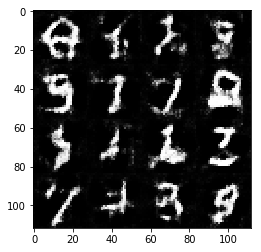

Epoch 1/2 -  Discriminator loss: 0.4170 -  Generator loss: 4.5196 -  D + G loss: 4.9366
Epoch 1/2 -  Discriminator loss: 0.4114 -  Generator loss: 2.7581 -  D + G loss: 3.1695
Epoch 1/2 -  Discriminator loss: 0.4160 -  Generator loss: 4.5728 -  D + G loss: 4.9888
Epoch 1/2 -  Discriminator loss: 0.3984 -  Generator loss: 2.9569 -  D + G loss: 3.3553
Epoch 1/2 -  Discriminator loss: 0.3788 -  Generator loss: 3.9454 -  D + G loss: 4.3242
Epoch 1/2 -  Discriminator loss: 0.3862 -  Generator loss: 3.0110 -  D + G loss: 3.3972
Epoch 1/2 -  Discriminator loss: 0.3786 -  Generator loss: 3.8709 -  D + G loss: 4.2495
Epoch 1/2 -  Discriminator loss: 0.3902 -  Generator loss: 2.9560 -  D + G loss: 3.3462
Epoch 1/2 -  Discriminator loss: 0.3855 -  Generator loss: 3.8594 -  D + G loss: 4.2450
Epoch 1/2 -  Discriminator loss: 0.3969 -  Generator loss: 2.8564 -  D + G loss: 3.2533
Epoch 1/2 -  Discriminator loss: 0.3995 -  Generator loss: 4.2135 -  D + G loss: 4.6130
Epoch 1/2 -  Discriminator loss:

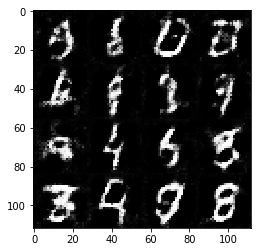

Epoch 1/2 -  Discriminator loss: 0.3993 -  Generator loss: 4.0050 -  D + G loss: 4.4044
Epoch 1/2 -  Discriminator loss: 0.4197 -  Generator loss: 2.7165 -  D + G loss: 3.1362
Epoch 1/2 -  Discriminator loss: 0.4344 -  Generator loss: 4.4905 -  D + G loss: 4.9249
Epoch 1/2 -  Discriminator loss: 0.3969 -  Generator loss: 2.8714 -  D + G loss: 3.2683
Epoch 1/2 -  Discriminator loss: 0.3910 -  Generator loss: 3.9339 -  D + G loss: 4.3249
Epoch 1/2 -  Discriminator loss: 0.3966 -  Generator loss: 2.8694 -  D + G loss: 3.2660
Epoch 1/2 -  Discriminator loss: 0.3841 -  Generator loss: 3.7478 -  D + G loss: 4.1319
Epoch 1/2 -  Discriminator loss: 0.3837 -  Generator loss: 3.0616 -  D + G loss: 3.4453
Epoch 1/2 -  Discriminator loss: 0.3789 -  Generator loss: 3.6829 -  D + G loss: 4.0618
Epoch 1/2 -  Discriminator loss: 0.3899 -  Generator loss: 2.9397 -  D + G loss: 3.3296
Epoch 1/2 -  Discriminator loss: 0.3786 -  Generator loss: 3.8132 -  D + G loss: 4.1918
Epoch 1/2 -  Discriminator loss:

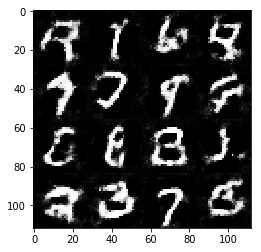

Epoch 1/2 -  Discriminator loss: 0.3825 -  Generator loss: 3.8365 -  D + G loss: 4.2189
Epoch 1/2 -  Discriminator loss: 0.4047 -  Generator loss: 2.7519 -  D + G loss: 3.1567
Epoch 1/2 -  Discriminator loss: 0.3958 -  Generator loss: 4.0663 -  D + G loss: 4.4620
Epoch 1/2 -  Discriminator loss: 0.4120 -  Generator loss: 2.7544 -  D + G loss: 3.1664
Epoch 1/2 -  Discriminator loss: 0.4213 -  Generator loss: 4.4036 -  D + G loss: 4.8250
Epoch 1/2 -  Discriminator loss: 0.4015 -  Generator loss: 2.8478 -  D + G loss: 3.2493
Epoch 1/2 -  Discriminator loss: 0.3899 -  Generator loss: 4.0556 -  D + G loss: 4.4456
Epoch 1/2 -  Discriminator loss: 0.4066 -  Generator loss: 2.7388 -  D + G loss: 3.1454
Epoch 1/2 -  Discriminator loss: 0.4176 -  Generator loss: 4.3049 -  D + G loss: 4.7225
Epoch 1/2 -  Discriminator loss: 0.3965 -  Generator loss: 2.9679 -  D + G loss: 3.3644
Epoch 1/2 -  Discriminator loss: 0.3827 -  Generator loss: 3.6363 -  D + G loss: 4.0190
Epoch 1/2 -  Discriminator loss:

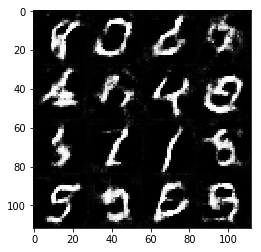

Epoch 1/2 -  Discriminator loss: 0.3920 -  Generator loss: 3.9794 -  D + G loss: 4.3714
Epoch 1/2 -  Discriminator loss: 0.4072 -  Generator loss: 2.7978 -  D + G loss: 3.2050
Epoch 1/2 -  Discriminator loss: 0.4168 -  Generator loss: 4.2396 -  D + G loss: 4.6565
Epoch 1/2 -  Discriminator loss: 0.4043 -  Generator loss: 2.8158 -  D + G loss: 3.2201
Epoch 1/2 -  Discriminator loss: 0.3867 -  Generator loss: 3.7639 -  D + G loss: 4.1506
Epoch 1/2 -  Discriminator loss: 0.3933 -  Generator loss: 2.8903 -  D + G loss: 3.2836
Epoch 1/2 -  Discriminator loss: 0.3905 -  Generator loss: 3.8815 -  D + G loss: 4.2720
Epoch 1/2 -  Discriminator loss: 0.4005 -  Generator loss: 2.8035 -  D + G loss: 3.2039
Epoch 1/2 -  Discriminator loss: 0.3924 -  Generator loss: 3.9196 -  D + G loss: 4.3120
Epoch 1/2 -  Discriminator loss: 0.4003 -  Generator loss: 2.8392 -  D + G loss: 3.2395
Epoch 1/2 -  Discriminator loss: 0.3933 -  Generator loss: 3.9775 -  D + G loss: 4.3708
Epoch 1/2 -  Discriminator loss:

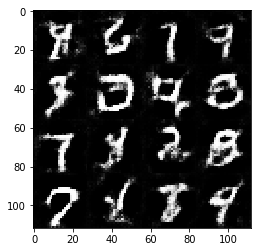

Epoch 1/2 -  Discriminator loss: 0.3918 -  Generator loss: 4.0766 -  D + G loss: 4.4684
Epoch 1/2 -  Discriminator loss: 0.4004 -  Generator loss: 2.8284 -  D + G loss: 3.2289
Epoch 1/2 -  Discriminator loss: 0.3945 -  Generator loss: 3.9563 -  D + G loss: 4.3508
Epoch 1/2 -  Discriminator loss: 0.3980 -  Generator loss: 2.8492 -  D + G loss: 3.2473
Epoch 1/2 -  Discriminator loss: 0.3898 -  Generator loss: 4.0539 -  D + G loss: 4.4437
Epoch 1/2 -  Discriminator loss: 0.4034 -  Generator loss: 2.7971 -  D + G loss: 3.2005
Epoch 1/2 -  Discriminator loss: 0.4042 -  Generator loss: 4.2401 -  D + G loss: 4.6443
Epoch 1/2 -  Discriminator loss: 0.4001 -  Generator loss: 2.8766 -  D + G loss: 3.2766
Epoch 1/2 -  Discriminator loss: 0.3912 -  Generator loss: 3.7752 -  D + G loss: 4.1664
Epoch 1/2 -  Discriminator loss: 0.3952 -  Generator loss: 2.8483 -  D + G loss: 3.2435
Epoch 1/2 -  Discriminator loss: 0.3865 -  Generator loss: 3.7937 -  D + G loss: 4.1802
Epoch 1/2 -  Discriminator loss:

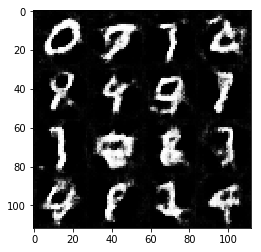

Epoch 1/2 -  Discriminator loss: 0.3823 -  Generator loss: 3.7126 -  D + G loss: 4.0949
Epoch 1/2 -  Discriminator loss: 0.3946 -  Generator loss: 2.8170 -  D + G loss: 3.2115
Epoch 1/2 -  Discriminator loss: 0.3856 -  Generator loss: 3.8483 -  D + G loss: 4.2339
Epoch 1/2 -  Discriminator loss: 0.4022 -  Generator loss: 2.7468 -  D + G loss: 3.1490
Epoch 1/2 -  Discriminator loss: 0.3964 -  Generator loss: 4.0463 -  D + G loss: 4.4427
Epoch 1/2 -  Discriminator loss: 0.3933 -  Generator loss: 2.9191 -  D + G loss: 3.3124
Epoch 1/2 -  Discriminator loss: 0.3866 -  Generator loss: 3.8421 -  D + G loss: 4.2287
Epoch 1/2 -  Discriminator loss: 0.4051 -  Generator loss: 2.7257 -  D + G loss: 3.1308
Epoch 1/2 -  Discriminator loss: 0.4000 -  Generator loss: 3.9042 -  D + G loss: 4.3042
Epoch 1/2 -  Discriminator loss: 0.3975 -  Generator loss: 2.8264 -  D + G loss: 3.2239
Epoch 1/2 -  Discriminator loss: 0.3806 -  Generator loss: 3.7091 -  D + G loss: 4.0897
Epoch 1/2 -  Discriminator loss:

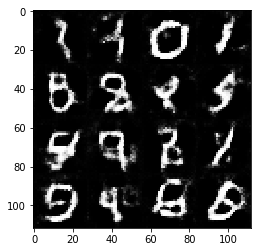

Epoch 1/2 -  Discriminator loss: 0.3933 -  Generator loss: 3.9180 -  D + G loss: 4.3113
Epoch 1/2 -  Discriminator loss: 0.4001 -  Generator loss: 2.7895 -  D + G loss: 3.1896
Epoch 1/2 -  Discriminator loss: 0.3879 -  Generator loss: 3.8976 -  D + G loss: 4.2854
Epoch 1/2 -  Discriminator loss: 0.4009 -  Generator loss: 2.7889 -  D + G loss: 3.1899
Epoch 1/2 -  Discriminator loss: 0.3857 -  Generator loss: 3.8303 -  D + G loss: 4.2160
Epoch 1/2 -  Discriminator loss: 0.3987 -  Generator loss: 2.8316 -  D + G loss: 3.2302
Epoch 1/2 -  Discriminator loss: 0.3896 -  Generator loss: 4.0344 -  D + G loss: 4.4239
Epoch 1/2 -  Discriminator loss: 0.4025 -  Generator loss: 2.8112 -  D + G loss: 3.2136
Epoch 1/2 -  Discriminator loss: 0.3936 -  Generator loss: 3.8670 -  D + G loss: 4.2606
Epoch 1/2 -  Discriminator loss: 0.4002 -  Generator loss: 2.8248 -  D + G loss: 3.2250
Epoch 1/2 -  Discriminator loss: 0.3991 -  Generator loss: 4.0609 -  D + G loss: 4.4599
Epoch 1/2 -  Discriminator loss:

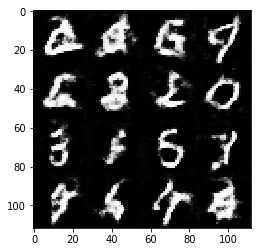

Epoch 1/2 -  Discriminator loss: 0.3950 -  Generator loss: 3.9929 -  D + G loss: 4.3879
Epoch 1/2 -  Discriminator loss: 0.4093 -  Generator loss: 2.7419 -  D + G loss: 3.1512
Epoch 1/2 -  Discriminator loss: 0.4014 -  Generator loss: 3.8879 -  D + G loss: 4.2893
Epoch 1/2 -  Discriminator loss: 0.3949 -  Generator loss: 2.8721 -  D + G loss: 3.2670
Epoch 1/2 -  Discriminator loss: 0.3813 -  Generator loss: 3.7214 -  D + G loss: 4.1027
Epoch 1/2 -  Discriminator loss: 0.3908 -  Generator loss: 2.9000 -  D + G loss: 3.2907
Epoch 1/2 -  Discriminator loss: 0.3793 -  Generator loss: 3.5789 -  D + G loss: 3.9583
Epoch 1/2 -  Discriminator loss: 0.3905 -  Generator loss: 2.9226 -  D + G loss: 3.3131
Epoch 1/2 -  Discriminator loss: 0.3857 -  Generator loss: 3.8205 -  D + G loss: 4.2061
Epoch 1/2 -  Discriminator loss: 0.4077 -  Generator loss: 2.7106 -  D + G loss: 3.1183
Epoch 1/2 -  Discriminator loss: 0.3971 -  Generator loss: 4.0243 -  D + G loss: 4.4213
Epoch 1/2 -  Discriminator loss:

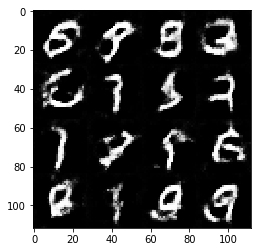

Epoch 1/2 -  Discriminator loss: 0.3764 -  Generator loss: 3.4726 -  D + G loss: 3.8490
Epoch 1/2 -  Discriminator loss: 0.3840 -  Generator loss: 2.9834 -  D + G loss: 3.3674
Epoch 1/2 -  Discriminator loss: 0.3777 -  Generator loss: 3.4674 -  D + G loss: 3.8451
Epoch 1/2 -  Discriminator loss: 0.3926 -  Generator loss: 2.9188 -  D + G loss: 3.3114
Epoch 1/2 -  Discriminator loss: 0.3921 -  Generator loss: 3.8213 -  D + G loss: 4.2133
Epoch 1/2 -  Discriminator loss: 0.4024 -  Generator loss: 2.7762 -  D + G loss: 3.1786
Epoch 1/2 -  Discriminator loss: 0.3861 -  Generator loss: 3.7330 -  D + G loss: 4.1190
Epoch 1/2 -  Discriminator loss: 0.4017 -  Generator loss: 2.7418 -  D + G loss: 3.1435
Epoch 1/2 -  Discriminator loss: 0.3965 -  Generator loss: 4.0412 -  D + G loss: 4.4377
Epoch 1/2 -  Discriminator loss: 0.4125 -  Generator loss: 2.7011 -  D + G loss: 3.1136
Epoch 1/2 -  Discriminator loss: 0.3919 -  Generator loss: 3.9925 -  D + G loss: 4.3843
Epoch 1/2 -  Discriminator loss:

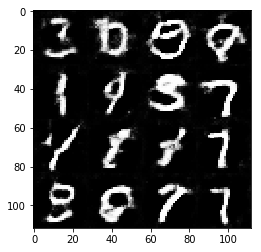

Epoch 1/2 -  Discriminator loss: 0.4156 -  Generator loss: 4.1965 -  D + G loss: 4.6120
Epoch 1/2 -  Discriminator loss: 0.4085 -  Generator loss: 2.7446 -  D + G loss: 3.1531
Epoch 1/2 -  Discriminator loss: 0.3950 -  Generator loss: 3.8950 -  D + G loss: 4.2901
Epoch 1/2 -  Discriminator loss: 0.4051 -  Generator loss: 2.7628 -  D + G loss: 3.1678
Epoch 1/2 -  Discriminator loss: 0.3883 -  Generator loss: 3.6733 -  D + G loss: 4.0617
Epoch 1/2 -  Discriminator loss: 0.3898 -  Generator loss: 2.9396 -  D + G loss: 3.3294
Epoch 1/2 -  Discriminator loss: 0.3799 -  Generator loss: 3.6225 -  D + G loss: 4.0024
Epoch 1/2 -  Discriminator loss: 0.3957 -  Generator loss: 2.9097 -  D + G loss: 3.3054
Epoch 1/2 -  Discriminator loss: 0.3859 -  Generator loss: 3.6479 -  D + G loss: 4.0338
Epoch 1/2 -  Discriminator loss: 0.3963 -  Generator loss: 2.8229 -  D + G loss: 3.2193
Epoch 1/2 -  Discriminator loss: 0.3932 -  Generator loss: 3.9242 -  D + G loss: 4.3174
Epoch 1/2 -  Discriminator loss:

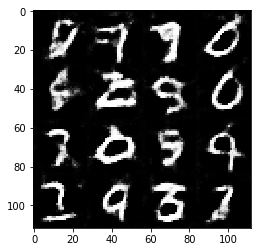

Epoch 1/2 -  Discriminator loss: 0.3780 -  Generator loss: 3.4381 -  D + G loss: 3.8161
Epoch 1/2 -  Discriminator loss: 0.3814 -  Generator loss: 3.0504 -  D + G loss: 3.4318
Epoch 1/2 -  Discriminator loss: 0.3778 -  Generator loss: 3.5219 -  D + G loss: 3.8997
Epoch 1/2 -  Discriminator loss: 0.3973 -  Generator loss: 2.7780 -  D + G loss: 3.1753
Epoch 1/2 -  Discriminator loss: 0.3834 -  Generator loss: 3.8075 -  D + G loss: 4.1909
Epoch 1/2 -  Discriminator loss: 0.3969 -  Generator loss: 2.8305 -  D + G loss: 3.2274
Epoch 1/2 -  Discriminator loss: 0.3954 -  Generator loss: 3.9022 -  D + G loss: 4.2976
Epoch 1/2 -  Discriminator loss: 0.4082 -  Generator loss: 2.6976 -  D + G loss: 3.1058
Epoch 1/2 -  Discriminator loss: 0.4053 -  Generator loss: 4.2400 -  D + G loss: 4.6453
Epoch 1/2 -  Discriminator loss: 0.4123 -  Generator loss: 2.6973 -  D + G loss: 3.1096
Epoch 1/2 -  Discriminator loss: 0.4061 -  Generator loss: 4.1188 -  D + G loss: 4.5248
Epoch 1/2 -  Discriminator loss:

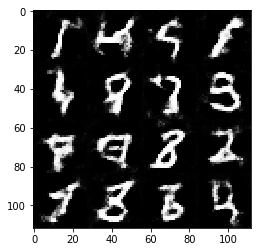

Epoch 1/2 -  Discriminator loss: 0.3928 -  Generator loss: 4.0214 -  D + G loss: 4.4142
Epoch 1/2 -  Discriminator loss: 0.4058 -  Generator loss: 2.7130 -  D + G loss: 3.1188
Epoch 1/2 -  Discriminator loss: 0.4001 -  Generator loss: 3.9521 -  D + G loss: 4.3522
Epoch 1/2 -  Discriminator loss: 0.4122 -  Generator loss: 2.7164 -  D + G loss: 3.1286
Epoch 1/2 -  Discriminator loss: 0.3938 -  Generator loss: 3.9310 -  D + G loss: 4.3248
Epoch 1/2 -  Discriminator loss: 0.4042 -  Generator loss: 2.7394 -  D + G loss: 3.1437
Epoch 1/2 -  Discriminator loss: 0.4054 -  Generator loss: 4.0111 -  D + G loss: 4.4165
Epoch 1/2 -  Discriminator loss: 0.4037 -  Generator loss: 2.7745 -  D + G loss: 3.1783
Epoch 1/2 -  Discriminator loss: 0.3868 -  Generator loss: 3.6827 -  D + G loss: 4.0695
Epoch 1/2 -  Discriminator loss: 0.3958 -  Generator loss: 2.8417 -  D + G loss: 3.2375
Epoch 1/2 -  Discriminator loss: 0.3900 -  Generator loss: 3.8874 -  D + G loss: 4.2774
Epoch 1/2 -  Discriminator loss:

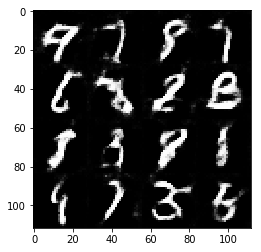

Epoch 1/2 -  Discriminator loss: 0.3883 -  Generator loss: 3.6512 -  D + G loss: 4.0395
Epoch 1/2 -  Discriminator loss: 0.3926 -  Generator loss: 2.8887 -  D + G loss: 3.2813
Epoch 1/2 -  Discriminator loss: 0.3788 -  Generator loss: 3.6410 -  D + G loss: 4.0198
Epoch 1/2 -  Discriminator loss: 0.3952 -  Generator loss: 2.8392 -  D + G loss: 3.2344
Epoch 1/2 -  Discriminator loss: 0.3799 -  Generator loss: 3.4236 -  D + G loss: 3.8036
Epoch 1/2 -  Discriminator loss: 0.3831 -  Generator loss: 3.0051 -  D + G loss: 3.3882
Epoch 1/2 -  Discriminator loss: 0.3755 -  Generator loss: 3.3771 -  D + G loss: 3.7527
Epoch 1/2 -  Discriminator loss: 0.3834 -  Generator loss: 3.0022 -  D + G loss: 3.3856
Epoch 1/2 -  Discriminator loss: 0.3822 -  Generator loss: 3.4509 -  D + G loss: 3.8331
Epoch 1/2 -  Discriminator loss: 0.3846 -  Generator loss: 2.9571 -  D + G loss: 3.3418
Epoch 1/2 -  Discriminator loss: 0.3778 -  Generator loss: 3.5170 -  D + G loss: 3.8948
Epoch 1/2 -  Discriminator loss:

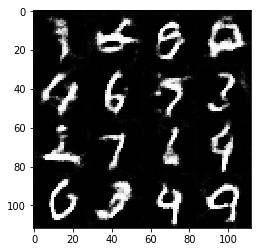

Epoch 1/2 -  Discriminator loss: 0.4025 -  Generator loss: 3.9010 -  D + G loss: 4.3035
Epoch 1/2 -  Discriminator loss: 0.3974 -  Generator loss: 2.8676 -  D + G loss: 3.2649
Epoch 1/2 -  Discriminator loss: 0.3903 -  Generator loss: 3.7460 -  D + G loss: 4.1363
Epoch 1/2 -  Discriminator loss: 0.4037 -  Generator loss: 2.7257 -  D + G loss: 3.1293
Epoch 1/2 -  Discriminator loss: 0.3908 -  Generator loss: 4.0788 -  D + G loss: 4.4696
Epoch 1/2 -  Discriminator loss: 0.4123 -  Generator loss: 2.6453 -  D + G loss: 3.0576
Epoch 1/2 -  Discriminator loss: 0.4038 -  Generator loss: 4.0956 -  D + G loss: 4.4994
Epoch 1/2 -  Discriminator loss: 0.4127 -  Generator loss: 2.6729 -  D + G loss: 3.0855
Epoch 1/2 -  Discriminator loss: 0.3971 -  Generator loss: 3.9713 -  D + G loss: 4.3684
Epoch 1/2 -  Discriminator loss: 0.4088 -  Generator loss: 2.7523 -  D + G loss: 3.1611
Epoch 1/2 -  Discriminator loss: 0.3942 -  Generator loss: 3.9802 -  D + G loss: 4.3743
Epoch 1/2 -  Discriminator loss:

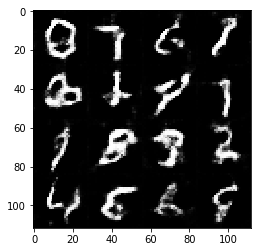

Epoch 1/2 -  Discriminator loss: 0.3875 -  Generator loss: 3.9082 -  D + G loss: 4.2957
Epoch 1/2 -  Discriminator loss: 0.4041 -  Generator loss: 2.7798 -  D + G loss: 3.1838
Epoch 1/2 -  Discriminator loss: 0.3944 -  Generator loss: 3.8905 -  D + G loss: 4.2850
Epoch 1/2 -  Discriminator loss: 0.4014 -  Generator loss: 2.7535 -  D + G loss: 3.1549
Epoch 1/2 -  Discriminator loss: 0.3998 -  Generator loss: 4.0170 -  D + G loss: 4.4168
Epoch 1/2 -  Discriminator loss: 0.4015 -  Generator loss: 2.7898 -  D + G loss: 3.1913
Epoch 1/2 -  Discriminator loss: 0.3916 -  Generator loss: 3.7605 -  D + G loss: 4.1520
Epoch 1/2 -  Discriminator loss: 0.4008 -  Generator loss: 2.7711 -  D + G loss: 3.1719
Epoch 1/2 -  Discriminator loss: 0.3870 -  Generator loss: 3.7617 -  D + G loss: 4.1487
Epoch 1/2 -  Discriminator loss: 0.3992 -  Generator loss: 2.8174 -  D + G loss: 3.2165
Epoch 1/2 -  Discriminator loss: 0.3906 -  Generator loss: 3.7514 -  D + G loss: 4.1420
Epoch 1/2 -  Discriminator loss:

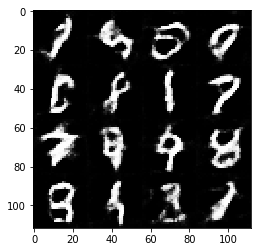

Epoch 1/2 -  Discriminator loss: 0.4097 -  Generator loss: 4.1303 -  D + G loss: 4.5400
Epoch 1/2 -  Discriminator loss: 0.4149 -  Generator loss: 2.6998 -  D + G loss: 3.1147
Epoch 1/2 -  Discriminator loss: 0.3974 -  Generator loss: 4.0691 -  D + G loss: 4.4666
Epoch 1/2 -  Discriminator loss: 0.4123 -  Generator loss: 2.6974 -  D + G loss: 3.1096
Epoch 1/2 -  Discriminator loss: 0.3992 -  Generator loss: 3.9338 -  D + G loss: 4.3331
Epoch 1/2 -  Discriminator loss: 0.3992 -  Generator loss: 2.8532 -  D + G loss: 3.2524
Epoch 1/2 -  Discriminator loss: 0.3841 -  Generator loss: 3.7008 -  D + G loss: 4.0849
Epoch 1/2 -  Discriminator loss: 0.3944 -  Generator loss: 2.8341 -  D + G loss: 3.2285
Epoch 1/2 -  Discriminator loss: 0.3855 -  Generator loss: 3.7615 -  D + G loss: 4.1469
Epoch 1/2 -  Discriminator loss: 0.3964 -  Generator loss: 2.8524 -  D + G loss: 3.2488
Epoch 1/2 -  Discriminator loss: 0.3895 -  Generator loss: 3.7882 -  D + G loss: 4.1777
Epoch 1/2 -  Discriminator loss:

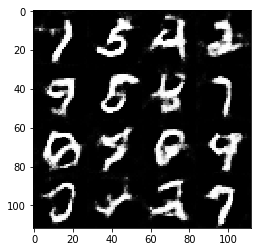

Epoch 1/2 -  Discriminator loss: 0.3767 -  Generator loss: 3.2720 -  D + G loss: 3.6488
Epoch 1/2 -  Discriminator loss: 0.3750 -  Generator loss: 3.2264 -  D + G loss: 3.6014
Epoch 1/2 -  Discriminator loss: 0.3756 -  Generator loss: 3.2654 -  D + G loss: 3.6410
Epoch 1/2 -  Discriminator loss: 0.3780 -  Generator loss: 3.2296 -  D + G loss: 3.6076
Epoch 1/2 -  Discriminator loss: 0.3826 -  Generator loss: 3.1792 -  D + G loss: 3.5618
Epoch 1/2 -  Discriminator loss: 0.3815 -  Generator loss: 3.4030 -  D + G loss: 3.7845
Epoch 1/2 -  Discriminator loss: 0.3823 -  Generator loss: 3.1052 -  D + G loss: 3.4875
Epoch 1/2 -  Discriminator loss: 0.3790 -  Generator loss: 3.4200 -  D + G loss: 3.7990
Epoch 1/2 -  Discriminator loss: 0.3932 -  Generator loss: 2.8660 -  D + G loss: 3.2592
Epoch 1/2 -  Discriminator loss: 0.3925 -  Generator loss: 3.8874 -  D + G loss: 4.2800
Epoch 1/2 -  Discriminator loss: 0.4262 -  Generator loss: 2.5437 -  D + G loss: 2.9698
Epoch 1/2 -  Discriminator loss:

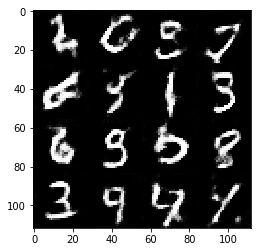

Epoch 1/2 -  Discriminator loss: 0.4054 -  Generator loss: 2.7446 -  D + G loss: 3.1500
Epoch 1/2 -  Discriminator loss: 0.4002 -  Generator loss: 4.0760 -  D + G loss: 4.4762
Epoch 1/2 -  Discriminator loss: 0.4013 -  Generator loss: 2.7864 -  D + G loss: 3.1878
Epoch 1/2 -  Discriminator loss: 0.3968 -  Generator loss: 3.9463 -  D + G loss: 4.3431
Epoch 1/2 -  Discriminator loss: 0.4108 -  Generator loss: 2.7074 -  D + G loss: 3.1183
Epoch 1/2 -  Discriminator loss: 0.4159 -  Generator loss: 4.3032 -  D + G loss: 4.7192
Epoch 1/2 -  Discriminator loss: 0.4044 -  Generator loss: 2.7342 -  D + G loss: 3.1386
Epoch 1/2 -  Discriminator loss: 0.3879 -  Generator loss: 3.5994 -  D + G loss: 3.9873
Epoch 1/2 -  Discriminator loss: 0.3995 -  Generator loss: 2.7468 -  D + G loss: 3.1464
Epoch 1/2 -  Discriminator loss: 0.3901 -  Generator loss: 3.8134 -  D + G loss: 4.2035
Epoch 1/2 -  Discriminator loss: 0.4005 -  Generator loss: 2.7950 -  D + G loss: 3.1955
Epoch 1/2 -  Discriminator loss:

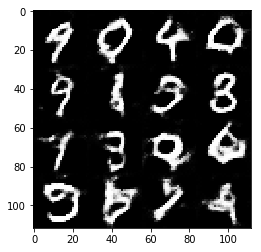

Epoch 1/2 -  Discriminator loss: 0.4031 -  Generator loss: 2.7549 -  D + G loss: 3.1580
Epoch 1/2 -  Discriminator loss: 0.3827 -  Generator loss: 3.8699 -  D + G loss: 4.2526
Epoch 1/2 -  Discriminator loss: 0.3944 -  Generator loss: 2.9115 -  D + G loss: 3.3060
Epoch 1/2 -  Discriminator loss: 0.3886 -  Generator loss: 3.9512 -  D + G loss: 4.3399
Epoch 1/2 -  Discriminator loss: 0.4096 -  Generator loss: 2.6813 -  D + G loss: 3.0908
Epoch 1/2 -  Discriminator loss: 0.4096 -  Generator loss: 4.0949 -  D + G loss: 4.5045
Epoch 1/2 -  Discriminator loss: 0.4075 -  Generator loss: 2.7424 -  D + G loss: 3.1499
Epoch 1/2 -  Discriminator loss: 0.3883 -  Generator loss: 3.6478 -  D + G loss: 4.0362
Epoch 1/2 -  Discriminator loss: 0.3972 -  Generator loss: 2.8215 -  D + G loss: 3.2187
Epoch 1/2 -  Discriminator loss: 0.3832 -  Generator loss: 3.6744 -  D + G loss: 4.0576
Epoch 1/2 -  Discriminator loss: 0.3976 -  Generator loss: 2.8064 -  D + G loss: 3.2040
Epoch 1/2 -  Discriminator loss:

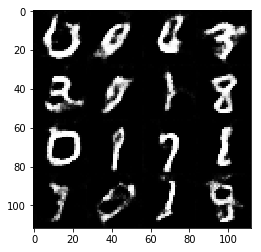

Epoch 1/2 -  Discriminator loss: 0.4019 -  Generator loss: 2.7552 -  D + G loss: 3.1571
Epoch 1/2 -  Discriminator loss: 0.3981 -  Generator loss: 4.0764 -  D + G loss: 4.4745
Epoch 1/2 -  Discriminator loss: 0.4127 -  Generator loss: 2.6411 -  D + G loss: 3.0538
Epoch 1/2 -  Discriminator loss: 0.4080 -  Generator loss: 4.1731 -  D + G loss: 4.5811
Epoch 1/2 -  Discriminator loss: 0.4059 -  Generator loss: 2.7335 -  D + G loss: 3.1394
Epoch 1/2 -  Discriminator loss: 0.4070 -  Generator loss: 4.1443 -  D + G loss: 4.5513
Epoch 1/2 -  Discriminator loss: 0.4064 -  Generator loss: 2.7921 -  D + G loss: 3.1985
Epoch 1/2 -  Discriminator loss: 0.4051 -  Generator loss: 4.0805 -  D + G loss: 4.4856
Epoch 1/2 -  Discriminator loss: 0.3968 -  Generator loss: 2.9510 -  D + G loss: 3.3478
Epoch 1/2 -  Discriminator loss: 0.3864 -  Generator loss: 3.4934 -  D + G loss: 3.8798
Epoch 1/2 -  Discriminator loss: 0.3872 -  Generator loss: 2.9177 -  D + G loss: 3.3049
Epoch 1/2 -  Discriminator loss:

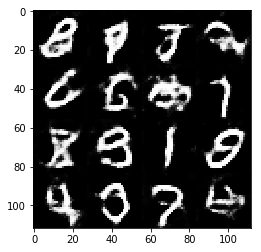

Epoch 1/2 -  Discriminator loss: 0.4048 -  Generator loss: 2.7520 -  D + G loss: 3.1567
Epoch 1/2 -  Discriminator loss: 0.3991 -  Generator loss: 4.0033 -  D + G loss: 4.4024
Epoch 1/2 -  Discriminator loss: 0.3948 -  Generator loss: 2.8910 -  D + G loss: 3.2857
Epoch 1/2 -  Discriminator loss: 0.3840 -  Generator loss: 3.6459 -  D + G loss: 4.0299
Epoch 1/2 -  Discriminator loss: 0.3945 -  Generator loss: 2.8139 -  D + G loss: 3.2084
Epoch 1/2 -  Discriminator loss: 0.3846 -  Generator loss: 3.8412 -  D + G loss: 4.2257
Epoch 1/2 -  Discriminator loss: 0.4028 -  Generator loss: 2.7726 -  D + G loss: 3.1755
Epoch 1/2 -  Discriminator loss: 0.3966 -  Generator loss: 3.8387 -  D + G loss: 4.2353
Epoch 1/2 -  Discriminator loss: 0.3992 -  Generator loss: 2.8192 -  D + G loss: 3.2185
Epoch 1/2 -  Discriminator loss: 0.3833 -  Generator loss: 3.7663 -  D + G loss: 4.1496


In [ ]:
batch_size = 128
z_dim = 128
learning_rate = 0.0001
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0/1 -  Discriminator loss: 0.9808 -  Generator loss: 0.7896 -  D + G loss: 1.7704
Epoch 0/1 -  Discriminator loss: 0.8987 -  Generator loss: 0.8594 -  D + G loss: 1.7581
Epoch 0/1 -  Discriminator loss: 0.8451 -  Generator loss: 0.9262 -  D + G loss: 1.7713
Epoch 0/1 -  Discriminator loss: 0.8089 -  Generator loss: 0.9844 -  D + G loss: 1.7933
Epoch 0/1 -  Discriminator loss: 0.7792 -  Generator loss: 1.0281 -  D + G loss: 1.8073
Epoch 0/1 -  Discriminator loss: 0.7505 -  Generator loss: 1.0753 -  D + G loss: 1.8258
Epoch 0/1 -  Discriminator loss: 0.7338 -  Generator loss: 1.1099 -  D + G loss: 1.8437
Epoch 0/1 -  Discriminator loss: 0.7163 -  Generator loss: 1.1420 -  D + G loss: 1.8583
Epoch 0/1 -  Discriminator loss: 0.7144 -  Generator loss: 1.1469 -  D + G loss: 1.8613
Epoch 0/1 -  Discriminator loss: 0.7038 -  Generator loss: 1.1717 -  D + G loss: 1.8756
Epoch 0/1 -  Discriminator loss: 0.7017 -  Generator loss: 1.1800 -  D + G loss: 1.8817
Epoch 0/1 -  Discriminator loss:

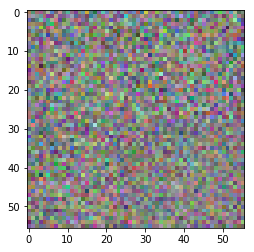

Epoch 0/1 -  Discriminator loss: 0.6595 -  Generator loss: 1.3057 -  D + G loss: 1.9652
Epoch 0/1 -  Discriminator loss: 0.6442 -  Generator loss: 1.3416 -  D + G loss: 1.9858
Epoch 0/1 -  Discriminator loss: 0.6398 -  Generator loss: 1.3659 -  D + G loss: 2.0057
Epoch 0/1 -  Discriminator loss: 0.6281 -  Generator loss: 1.3875 -  D + G loss: 2.0156
Epoch 0/1 -  Discriminator loss: 0.6194 -  Generator loss: 1.4103 -  D + G loss: 2.0297
Epoch 0/1 -  Discriminator loss: 0.6123 -  Generator loss: 1.4484 -  D + G loss: 2.0608
Epoch 0/1 -  Discriminator loss: 0.6148 -  Generator loss: 1.4628 -  D + G loss: 2.0776
Epoch 0/1 -  Discriminator loss: 0.6044 -  Generator loss: 1.4887 -  D + G loss: 2.0931
Epoch 0/1 -  Discriminator loss: 0.6248 -  Generator loss: 1.4643 -  D + G loss: 2.0891
Epoch 0/1 -  Discriminator loss: 0.5995 -  Generator loss: 1.4943 -  D + G loss: 2.0938
Epoch 0/1 -  Discriminator loss: 0.6033 -  Generator loss: 1.4954 -  D + G loss: 2.0988
Epoch 0/1 -  Discriminator loss:

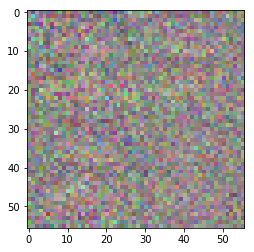

Epoch 0/1 -  Discriminator loss: 0.5750 -  Generator loss: 1.6074 -  D + G loss: 2.1825
Epoch 0/1 -  Discriminator loss: 0.5764 -  Generator loss: 1.6055 -  D + G loss: 2.1818
Epoch 0/1 -  Discriminator loss: 0.5784 -  Generator loss: 1.6094 -  D + G loss: 2.1878
Epoch 0/1 -  Discriminator loss: 0.5749 -  Generator loss: 1.5973 -  D + G loss: 2.1722
Epoch 0/1 -  Discriminator loss: 0.5646 -  Generator loss: 1.6362 -  D + G loss: 2.2008
Epoch 0/1 -  Discriminator loss: 0.5752 -  Generator loss: 1.6329 -  D + G loss: 2.2081
Epoch 0/1 -  Discriminator loss: 0.5788 -  Generator loss: 1.6148 -  D + G loss: 2.1936
Epoch 0/1 -  Discriminator loss: 0.5893 -  Generator loss: 1.5986 -  D + G loss: 2.1879
Epoch 0/1 -  Discriminator loss: 0.5797 -  Generator loss: 1.5992 -  D + G loss: 2.1789
Epoch 0/1 -  Discriminator loss: 0.5642 -  Generator loss: 1.6337 -  D + G loss: 2.1979
Epoch 0/1 -  Discriminator loss: 0.5736 -  Generator loss: 1.6447 -  D + G loss: 2.2183
Epoch 0/1 -  Discriminator loss:

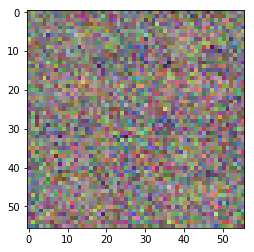

Epoch 0/1 -  Discriminator loss: 0.5420 -  Generator loss: 1.7860 -  D + G loss: 2.3279
Epoch 0/1 -  Discriminator loss: 0.5303 -  Generator loss: 1.8093 -  D + G loss: 2.3396
Epoch 0/1 -  Discriminator loss: 0.5401 -  Generator loss: 1.7881 -  D + G loss: 2.3282
Epoch 0/1 -  Discriminator loss: 0.5319 -  Generator loss: 1.8165 -  D + G loss: 2.3484
Epoch 0/1 -  Discriminator loss: 0.5233 -  Generator loss: 1.8402 -  D + G loss: 2.3635
Epoch 0/1 -  Discriminator loss: 0.5402 -  Generator loss: 1.7791 -  D + G loss: 2.3194
Epoch 0/1 -  Discriminator loss: 0.5503 -  Generator loss: 1.8824 -  D + G loss: 2.4327
Epoch 0/1 -  Discriminator loss: 0.5273 -  Generator loss: 1.8012 -  D + G loss: 2.3285
Epoch 0/1 -  Discriminator loss: 0.5221 -  Generator loss: 1.8172 -  D + G loss: 2.3393
Epoch 0/1 -  Discriminator loss: 0.5198 -  Generator loss: 1.8872 -  D + G loss: 2.4070
Epoch 0/1 -  Discriminator loss: 0.5291 -  Generator loss: 1.8748 -  D + G loss: 2.4039
Epoch 0/1 -  Discriminator loss:

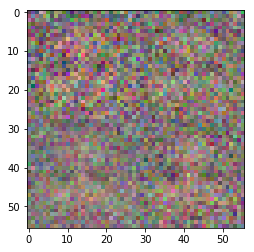

Epoch 0/1 -  Discriminator loss: 0.5071 -  Generator loss: 1.9641 -  D + G loss: 2.4712
Epoch 0/1 -  Discriminator loss: 0.5008 -  Generator loss: 1.9947 -  D + G loss: 2.4955
Epoch 0/1 -  Discriminator loss: 0.5050 -  Generator loss: 2.0219 -  D + G loss: 2.5269
Epoch 0/1 -  Discriminator loss: 0.5045 -  Generator loss: 1.9805 -  D + G loss: 2.4850
Epoch 0/1 -  Discriminator loss: 0.5308 -  Generator loss: 2.0373 -  D + G loss: 2.5681
Epoch 0/1 -  Discriminator loss: 0.5095 -  Generator loss: 1.9391 -  D + G loss: 2.4486
Epoch 0/1 -  Discriminator loss: 0.5041 -  Generator loss: 1.9919 -  D + G loss: 2.4960
Epoch 0/1 -  Discriminator loss: 0.5113 -  Generator loss: 1.9550 -  D + G loss: 2.4663
Epoch 0/1 -  Discriminator loss: 0.4914 -  Generator loss: 2.0424 -  D + G loss: 2.5337
Epoch 0/1 -  Discriminator loss: 0.5063 -  Generator loss: 1.9817 -  D + G loss: 2.4879
Epoch 0/1 -  Discriminator loss: 0.4969 -  Generator loss: 2.0795 -  D + G loss: 2.5764
Epoch 0/1 -  Discriminator loss:

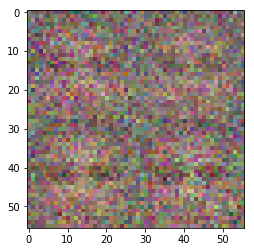

Epoch 0/1 -  Discriminator loss: 0.4981 -  Generator loss: 2.1036 -  D + G loss: 2.6017
Epoch 0/1 -  Discriminator loss: 0.4769 -  Generator loss: 2.1390 -  D + G loss: 2.6159
Epoch 0/1 -  Discriminator loss: 0.5048 -  Generator loss: 2.1377 -  D + G loss: 2.6424
Epoch 0/1 -  Discriminator loss: 0.5174 -  Generator loss: 1.9403 -  D + G loss: 2.4578
Epoch 0/1 -  Discriminator loss: 0.6128 -  Generator loss: 2.5047 -  D + G loss: 3.1175
Epoch 0/1 -  Discriminator loss: 0.5855 -  Generator loss: 1.8174 -  D + G loss: 2.4030
Epoch 0/1 -  Discriminator loss: 0.5233 -  Generator loss: 2.1900 -  D + G loss: 2.7134
Epoch 0/1 -  Discriminator loss: 0.4808 -  Generator loss: 2.1336 -  D + G loss: 2.6144
Epoch 0/1 -  Discriminator loss: 0.4797 -  Generator loss: 2.1423 -  D + G loss: 2.6220
Epoch 0/1 -  Discriminator loss: 0.4586 -  Generator loss: 2.3286 -  D + G loss: 2.7872
Epoch 0/1 -  Discriminator loss: 0.4595 -  Generator loss: 2.3845 -  D + G loss: 2.8440
Epoch 0/1 -  Discriminator loss:

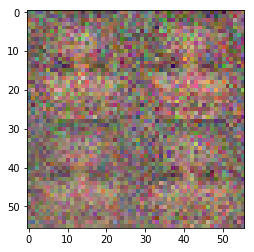

Epoch 0/1 -  Discriminator loss: 0.4628 -  Generator loss: 2.3040 -  D + G loss: 2.7668
Epoch 0/1 -  Discriminator loss: 0.4605 -  Generator loss: 2.2764 -  D + G loss: 2.7369
Epoch 0/1 -  Discriminator loss: 0.4485 -  Generator loss: 2.5176 -  D + G loss: 2.9661
Epoch 0/1 -  Discriminator loss: 0.4464 -  Generator loss: 2.4675 -  D + G loss: 2.9139
Epoch 0/1 -  Discriminator loss: 0.4463 -  Generator loss: 2.4198 -  D + G loss: 2.8661
Epoch 0/1 -  Discriminator loss: 0.4457 -  Generator loss: 2.5575 -  D + G loss: 3.0033
Epoch 0/1 -  Discriminator loss: 0.4863 -  Generator loss: 2.2357 -  D + G loss: 2.7220
Epoch 0/1 -  Discriminator loss: 0.4988 -  Generator loss: 2.6718 -  D + G loss: 3.1706
Epoch 0/1 -  Discriminator loss: 0.4559 -  Generator loss: 2.2817 -  D + G loss: 2.7376
Epoch 0/1 -  Discriminator loss: 0.4506 -  Generator loss: 2.5972 -  D + G loss: 3.0478
Epoch 0/1 -  Discriminator loss: 0.4619 -  Generator loss: 2.3118 -  D + G loss: 2.7737
Epoch 0/1 -  Discriminator loss:

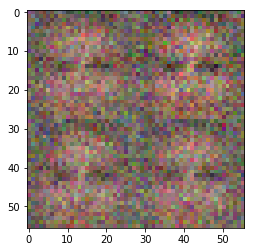

Epoch 0/1 -  Discriminator loss: 0.4545 -  Generator loss: 2.4333 -  D + G loss: 2.8878
Epoch 0/1 -  Discriminator loss: 0.4497 -  Generator loss: 2.7323 -  D + G loss: 3.1820
Epoch 0/1 -  Discriminator loss: 0.4433 -  Generator loss: 2.4609 -  D + G loss: 2.9043
Epoch 0/1 -  Discriminator loss: 0.4226 -  Generator loss: 2.8544 -  D + G loss: 3.2770
Epoch 0/1 -  Discriminator loss: 0.4219 -  Generator loss: 2.6183 -  D + G loss: 3.0402
Epoch 0/1 -  Discriminator loss: 0.4239 -  Generator loss: 2.9601 -  D + G loss: 3.3840
Epoch 0/1 -  Discriminator loss: 0.4371 -  Generator loss: 2.5338 -  D + G loss: 2.9709
Epoch 0/1 -  Discriminator loss: 0.4383 -  Generator loss: 2.9499 -  D + G loss: 3.3881
Epoch 0/1 -  Discriminator loss: 0.4391 -  Generator loss: 2.4732 -  D + G loss: 2.9123
Epoch 0/1 -  Discriminator loss: 0.4301 -  Generator loss: 2.7133 -  D + G loss: 3.1434
Epoch 0/1 -  Discriminator loss: 0.4200 -  Generator loss: 2.8161 -  D + G loss: 3.2361
Epoch 0/1 -  Discriminator loss:

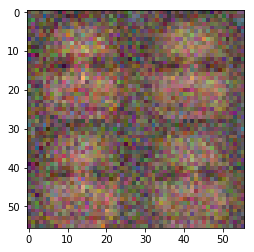

Epoch 0/1 -  Discriminator loss: 0.4126 -  Generator loss: 3.0303 -  D + G loss: 3.4429
Epoch 0/1 -  Discriminator loss: 0.4625 -  Generator loss: 2.3727 -  D + G loss: 2.8352
Epoch 0/1 -  Discriminator loss: 0.5758 -  Generator loss: 3.6043 -  D + G loss: 4.1801
Epoch 0/1 -  Discriminator loss: 0.4431 -  Generator loss: 2.6136 -  D + G loss: 3.0567
Epoch 0/1 -  Discriminator loss: 0.4552 -  Generator loss: 2.3949 -  D + G loss: 2.8501
Epoch 0/1 -  Discriminator loss: 0.4227 -  Generator loss: 2.8836 -  D + G loss: 3.3064
Epoch 0/1 -  Discriminator loss: 0.4062 -  Generator loss: 2.8599 -  D + G loss: 3.2661
Epoch 0/1 -  Discriminator loss: 0.4082 -  Generator loss: 2.8537 -  D + G loss: 3.2619
Epoch 0/1 -  Discriminator loss: 0.4137 -  Generator loss: 2.9235 -  D + G loss: 3.3372
Epoch 0/1 -  Discriminator loss: 0.4174 -  Generator loss: 2.6181 -  D + G loss: 3.0355
Epoch 0/1 -  Discriminator loss: 0.4240 -  Generator loss: 2.9758 -  D + G loss: 3.3997
Epoch 0/1 -  Discriminator loss:

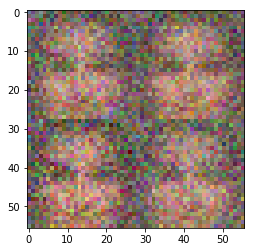

Epoch 0/1 -  Discriminator loss: 0.4102 -  Generator loss: 2.8439 -  D + G loss: 3.2541
Epoch 0/1 -  Discriminator loss: 0.4023 -  Generator loss: 3.1113 -  D + G loss: 3.5136
Epoch 0/1 -  Discriminator loss: 0.3964 -  Generator loss: 2.8654 -  D + G loss: 3.2618
Epoch 0/1 -  Discriminator loss: 0.3993 -  Generator loss: 3.1457 -  D + G loss: 3.5450
Epoch 0/1 -  Discriminator loss: 0.3918 -  Generator loss: 2.8791 -  D + G loss: 3.2709
Epoch 0/1 -  Discriminator loss: 0.3976 -  Generator loss: 3.3039 -  D + G loss: 3.7016
Epoch 0/1 -  Discriminator loss: 0.4320 -  Generator loss: 2.6119 -  D + G loss: 3.0439
Epoch 0/1 -  Discriminator loss: 0.4425 -  Generator loss: 3.6654 -  D + G loss: 4.1079
Epoch 0/1 -  Discriminator loss: 0.4977 -  Generator loss: 2.3288 -  D + G loss: 2.8264
Epoch 0/1 -  Discriminator loss: 0.5175 -  Generator loss: 3.9244 -  D + G loss: 4.4420
Epoch 0/1 -  Discriminator loss: 0.4212 -  Generator loss: 2.7219 -  D + G loss: 3.1431
Epoch 0/1 -  Discriminator loss:

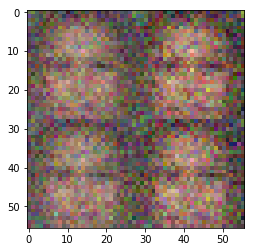

Epoch 0/1 -  Discriminator loss: 0.5564 -  Generator loss: 4.2902 -  D + G loss: 4.8466
Epoch 0/1 -  Discriminator loss: 0.4407 -  Generator loss: 2.5737 -  D + G loss: 3.0143
Epoch 0/1 -  Discriminator loss: 0.4016 -  Generator loss: 2.9554 -  D + G loss: 3.3569
Epoch 0/1 -  Discriminator loss: 0.4075 -  Generator loss: 3.5626 -  D + G loss: 3.9701
Epoch 0/1 -  Discriminator loss: 0.4069 -  Generator loss: 2.7180 -  D + G loss: 3.1248
Epoch 0/1 -  Discriminator loss: 0.3924 -  Generator loss: 3.4343 -  D + G loss: 3.8267
Epoch 0/1 -  Discriminator loss: 0.3865 -  Generator loss: 3.2100 -  D + G loss: 3.5964
Epoch 0/1 -  Discriminator loss: 0.3850 -  Generator loss: 2.9673 -  D + G loss: 3.3523
Epoch 0/1 -  Discriminator loss: 0.3960 -  Generator loss: 3.0631 -  D + G loss: 3.4590
Epoch 0/1 -  Discriminator loss: 0.3884 -  Generator loss: 3.0661 -  D + G loss: 3.4545
Epoch 0/1 -  Discriminator loss: 0.3833 -  Generator loss: 3.4358 -  D + G loss: 3.8190
Epoch 0/1 -  Discriminator loss:

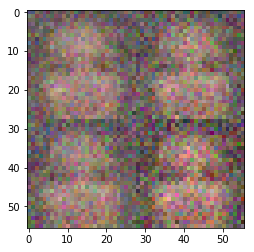

Epoch 0/1 -  Discriminator loss: 0.3824 -  Generator loss: 3.4957 -  D + G loss: 3.8780
Epoch 0/1 -  Discriminator loss: 0.3863 -  Generator loss: 3.0171 -  D + G loss: 3.4034
Epoch 0/1 -  Discriminator loss: 0.4201 -  Generator loss: 3.7944 -  D + G loss: 4.2146
Epoch 0/1 -  Discriminator loss: 0.4680 -  Generator loss: 2.4741 -  D + G loss: 2.9421
Epoch 0/1 -  Discriminator loss: 0.5312 -  Generator loss: 4.6117 -  D + G loss: 5.1429
Epoch 0/1 -  Discriminator loss: 0.3807 -  Generator loss: 3.1648 -  D + G loss: 3.5455
Epoch 0/1 -  Discriminator loss: 0.3910 -  Generator loss: 2.9524 -  D + G loss: 3.3434
Epoch 0/1 -  Discriminator loss: 0.4045 -  Generator loss: 3.8219 -  D + G loss: 4.2264
Epoch 0/1 -  Discriminator loss: 0.3837 -  Generator loss: 3.0793 -  D + G loss: 3.4630
Epoch 0/1 -  Discriminator loss: 0.3778 -  Generator loss: 3.1901 -  D + G loss: 3.5679
Epoch 0/1 -  Discriminator loss: 0.3842 -  Generator loss: 3.7949 -  D + G loss: 4.1792
Epoch 0/1 -  Discriminator loss:

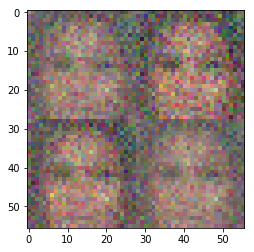

Epoch 0/1 -  Discriminator loss: 0.3707 -  Generator loss: 3.3422 -  D + G loss: 3.7129
Epoch 0/1 -  Discriminator loss: 0.3711 -  Generator loss: 3.4601 -  D + G loss: 3.8312
Epoch 0/1 -  Discriminator loss: 0.3717 -  Generator loss: 3.7385 -  D + G loss: 4.1102
Epoch 0/1 -  Discriminator loss: 0.4111 -  Generator loss: 2.8765 -  D + G loss: 3.2876
Epoch 0/1 -  Discriminator loss: 0.4203 -  Generator loss: 4.2622 -  D + G loss: 4.6825
Epoch 0/1 -  Discriminator loss: 0.4211 -  Generator loss: 2.8589 -  D + G loss: 3.2800
Epoch 0/1 -  Discriminator loss: 0.4467 -  Generator loss: 4.5142 -  D + G loss: 4.9609
Epoch 0/1 -  Discriminator loss: 0.3747 -  Generator loss: 3.4912 -  D + G loss: 3.8659
Epoch 0/1 -  Discriminator loss: 0.3998 -  Generator loss: 2.8872 -  D + G loss: 3.2870
Epoch 0/1 -  Discriminator loss: 0.4149 -  Generator loss: 4.0938 -  D + G loss: 4.5087
Epoch 0/1 -  Discriminator loss: 0.3829 -  Generator loss: 3.1116 -  D + G loss: 3.4945
Epoch 0/1 -  Discriminator loss:

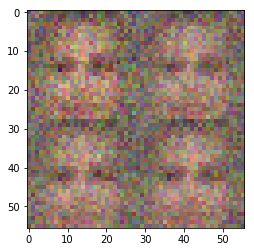

Epoch 0/1 -  Discriminator loss: 0.4650 -  Generator loss: 4.6550 -  D + G loss: 5.1200
Epoch 0/1 -  Discriminator loss: 0.4001 -  Generator loss: 3.5374 -  D + G loss: 3.9376
Epoch 0/1 -  Discriminator loss: 0.4719 -  Generator loss: 2.3273 -  D + G loss: 2.7992
Epoch 0/1 -  Discriminator loss: 0.4715 -  Generator loss: 3.6355 -  D + G loss: 4.1071
Epoch 0/1 -  Discriminator loss: 0.4176 -  Generator loss: 2.7762 -  D + G loss: 3.1938
Epoch 0/1 -  Discriminator loss: 0.4356 -  Generator loss: 2.5113 -  D + G loss: 2.9469
Epoch 0/1 -  Discriminator loss: 0.4069 -  Generator loss: 3.3316 -  D + G loss: 3.7384
Epoch 0/1 -  Discriminator loss: 0.4010 -  Generator loss: 3.0075 -  D + G loss: 3.4086
Epoch 0/1 -  Discriminator loss: 0.4035 -  Generator loss: 2.8914 -  D + G loss: 3.2949
Epoch 0/1 -  Discriminator loss: 0.4069 -  Generator loss: 3.1366 -  D + G loss: 3.5435
Epoch 0/1 -  Discriminator loss: 0.4102 -  Generator loss: 3.0583 -  D + G loss: 3.4685
Epoch 0/1 -  Discriminator loss:

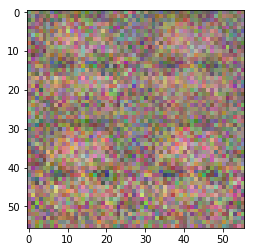

Epoch 0/1 -  Discriminator loss: 0.3763 -  Generator loss: 3.8450 -  D + G loss: 4.2212
Epoch 0/1 -  Discriminator loss: 0.3950 -  Generator loss: 3.0411 -  D + G loss: 3.4361
Epoch 0/1 -  Discriminator loss: 0.3954 -  Generator loss: 3.0118 -  D + G loss: 3.4072
Epoch 0/1 -  Discriminator loss: 0.3915 -  Generator loss: 3.3010 -  D + G loss: 3.6925
Epoch 0/1 -  Discriminator loss: 0.3883 -  Generator loss: 3.0528 -  D + G loss: 3.4411
Epoch 0/1 -  Discriminator loss: 0.3790 -  Generator loss: 3.4618 -  D + G loss: 3.8407
Epoch 0/1 -  Discriminator loss: 0.4033 -  Generator loss: 3.0420 -  D + G loss: 3.4453
Epoch 0/1 -  Discriminator loss: 0.3816 -  Generator loss: 3.4205 -  D + G loss: 3.8021
Epoch 0/1 -  Discriminator loss: 0.3857 -  Generator loss: 3.5600 -  D + G loss: 3.9457
Epoch 0/1 -  Discriminator loss: 0.3883 -  Generator loss: 3.0908 -  D + G loss: 3.4792
Epoch 0/1 -  Discriminator loss: 0.3860 -  Generator loss: 4.0034 -  D + G loss: 4.3894
Epoch 0/1 -  Discriminator loss:

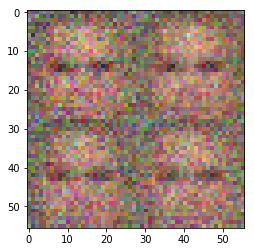

Epoch 0/1 -  Discriminator loss: 0.3734 -  Generator loss: 3.4672 -  D + G loss: 3.8406
Epoch 0/1 -  Discriminator loss: 0.3690 -  Generator loss: 3.6238 -  D + G loss: 3.9927
Epoch 0/1 -  Discriminator loss: 0.3916 -  Generator loss: 3.1289 -  D + G loss: 3.5205
Epoch 0/1 -  Discriminator loss: 0.3965 -  Generator loss: 4.1342 -  D + G loss: 4.5307
Epoch 0/1 -  Discriminator loss: 0.3850 -  Generator loss: 3.1850 -  D + G loss: 3.5700
Epoch 0/1 -  Discriminator loss: 0.3799 -  Generator loss: 3.4294 -  D + G loss: 3.8093
Epoch 0/1 -  Discriminator loss: 0.3757 -  Generator loss: 3.7384 -  D + G loss: 4.1141
Epoch 0/1 -  Discriminator loss: 0.3785 -  Generator loss: 3.3985 -  D + G loss: 3.7770
Epoch 0/1 -  Discriminator loss: 0.3705 -  Generator loss: 3.7079 -  D + G loss: 4.0784
Epoch 0/1 -  Discriminator loss: 0.3798 -  Generator loss: 3.3650 -  D + G loss: 3.7448
Epoch 0/1 -  Discriminator loss: 0.3801 -  Generator loss: 3.4803 -  D + G loss: 3.8604
Epoch 0/1 -  Discriminator loss:

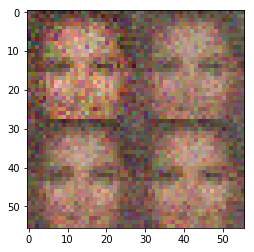

Epoch 0/1 -  Discriminator loss: 0.3748 -  Generator loss: 3.3976 -  D + G loss: 3.7723
Epoch 0/1 -  Discriminator loss: 0.3728 -  Generator loss: 3.7284 -  D + G loss: 4.1012
Epoch 0/1 -  Discriminator loss: 0.3702 -  Generator loss: 3.6974 -  D + G loss: 4.0676
Epoch 0/1 -  Discriminator loss: 0.3826 -  Generator loss: 3.1705 -  D + G loss: 3.5531
Epoch 0/1 -  Discriminator loss: 0.3904 -  Generator loss: 4.0166 -  D + G loss: 4.4070
Epoch 0/1 -  Discriminator loss: 0.3816 -  Generator loss: 3.2849 -  D + G loss: 3.6665
Epoch 0/1 -  Discriminator loss: 0.3670 -  Generator loss: 3.6919 -  D + G loss: 4.0589
Epoch 0/1 -  Discriminator loss: 0.3674 -  Generator loss: 3.7330 -  D + G loss: 4.1004
Epoch 0/1 -  Discriminator loss: 0.3740 -  Generator loss: 3.3157 -  D + G loss: 3.6897
Epoch 0/1 -  Discriminator loss: 0.3790 -  Generator loss: 4.1041 -  D + G loss: 4.4831
Epoch 0/1 -  Discriminator loss: 0.3961 -  Generator loss: 3.0812 -  D + G loss: 3.4773
Epoch 0/1 -  Discriminator loss:

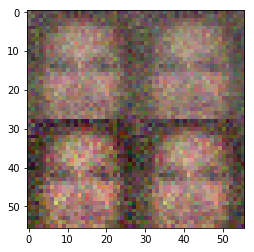

Epoch 0/1 -  Discriminator loss: 0.3708 -  Generator loss: 3.4177 -  D + G loss: 3.7885
Epoch 0/1 -  Discriminator loss: 0.3741 -  Generator loss: 3.9964 -  D + G loss: 4.3705
Epoch 0/1 -  Discriminator loss: 0.3815 -  Generator loss: 3.1400 -  D + G loss: 3.5215
Epoch 0/1 -  Discriminator loss: 0.4060 -  Generator loss: 4.5507 -  D + G loss: 4.9567
Epoch 0/1 -  Discriminator loss: 0.4496 -  Generator loss: 2.5112 -  D + G loss: 2.9608
Epoch 0/1 -  Discriminator loss: 0.4915 -  Generator loss: 5.4257 -  D + G loss: 5.9173
Epoch 0/1 -  Discriminator loss: 0.3626 -  Generator loss: 3.8338 -  D + G loss: 4.1964
Epoch 0/1 -  Discriminator loss: 0.4590 -  Generator loss: 2.5223 -  D + G loss: 2.9813
Epoch 0/1 -  Discriminator loss: 0.6261 -  Generator loss: 6.1276 -  D + G loss: 6.7537
Epoch 0/1 -  Discriminator loss: 0.3966 -  Generator loss: 4.6686 -  D + G loss: 5.0651
Epoch 0/1 -  Discriminator loss: 0.5700 -  Generator loss: 2.1434 -  D + G loss: 2.7134
Epoch 0/1 -  Discriminator loss:

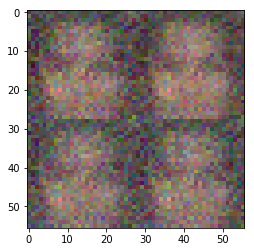

Epoch 0/1 -  Discriminator loss: 0.3695 -  Generator loss: 3.6510 -  D + G loss: 4.0204
Epoch 0/1 -  Discriminator loss: 0.3684 -  Generator loss: 3.4862 -  D + G loss: 3.8546
Epoch 0/1 -  Discriminator loss: 0.3626 -  Generator loss: 3.5793 -  D + G loss: 3.9419
Epoch 0/1 -  Discriminator loss: 0.3633 -  Generator loss: 3.7765 -  D + G loss: 4.1398
Epoch 0/1 -  Discriminator loss: 0.3603 -  Generator loss: 3.7248 -  D + G loss: 4.0851
Epoch 0/1 -  Discriminator loss: 0.3665 -  Generator loss: 3.5599 -  D + G loss: 3.9264
Epoch 0/1 -  Discriminator loss: 0.3682 -  Generator loss: 4.2309 -  D + G loss: 4.5991
Epoch 0/1 -  Discriminator loss: 0.3975 -  Generator loss: 2.9850 -  D + G loss: 3.3824
Epoch 0/1 -  Discriminator loss: 0.4316 -  Generator loss: 5.1742 -  D + G loss: 5.6058
Epoch 0/1 -  Discriminator loss: 0.3820 -  Generator loss: 3.2653 -  D + G loss: 3.6473
Epoch 0/1 -  Discriminator loss: 0.3658 -  Generator loss: 3.9907 -  D + G loss: 4.3564
Epoch 0/1 -  Discriminator loss:

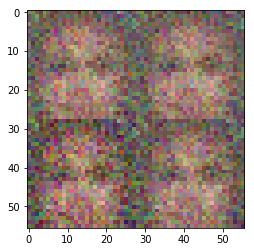

Epoch 0/1 -  Discriminator loss: 0.3698 -  Generator loss: 3.4004 -  D + G loss: 3.7702
Epoch 0/1 -  Discriminator loss: 0.3635 -  Generator loss: 3.5852 -  D + G loss: 3.9487
Epoch 0/1 -  Discriminator loss: 0.3624 -  Generator loss: 3.8254 -  D + G loss: 4.1878
Epoch 0/1 -  Discriminator loss: 0.3567 -  Generator loss: 4.0768 -  D + G loss: 4.4334
Epoch 0/1 -  Discriminator loss: 0.3952 -  Generator loss: 2.9323 -  D + G loss: 3.3275
Epoch 0/1 -  Discriminator loss: 0.4104 -  Generator loss: 5.1343 -  D + G loss: 5.5447
Epoch 0/1 -  Discriminator loss: 0.4003 -  Generator loss: 2.9714 -  D + G loss: 3.3717
Epoch 0/1 -  Discriminator loss: 0.3862 -  Generator loss: 4.8953 -  D + G loss: 5.2815
Epoch 0/1 -  Discriminator loss: 0.3803 -  Generator loss: 3.1479 -  D + G loss: 3.5282
Epoch 0/1 -  Discriminator loss: 0.3601 -  Generator loss: 4.0132 -  D + G loss: 4.3733
Epoch 0/1 -  Discriminator loss: 0.3587 -  Generator loss: 4.1110 -  D + G loss: 4.4697
Epoch 0/1 -  Discriminator loss:

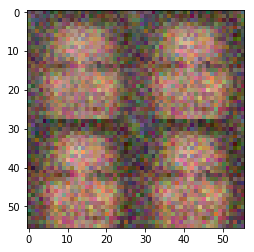

Epoch 0/1 -  Discriminator loss: 0.3824 -  Generator loss: 4.2690 -  D + G loss: 4.6514
Epoch 0/1 -  Discriminator loss: 0.3704 -  Generator loss: 3.3148 -  D + G loss: 3.6852
Epoch 0/1 -  Discriminator loss: 0.3580 -  Generator loss: 4.3331 -  D + G loss: 4.6911
Epoch 0/1 -  Discriminator loss: 0.3611 -  Generator loss: 3.5306 -  D + G loss: 3.8917
Epoch 0/1 -  Discriminator loss: 0.3608 -  Generator loss: 3.7815 -  D + G loss: 4.1423
Epoch 0/1 -  Discriminator loss: 0.3635 -  Generator loss: 3.9000 -  D + G loss: 4.2634
Epoch 0/1 -  Discriminator loss: 0.3802 -  Generator loss: 3.2609 -  D + G loss: 3.6412
Epoch 0/1 -  Discriminator loss: 0.3829 -  Generator loss: 4.6393 -  D + G loss: 5.0222
Epoch 0/1 -  Discriminator loss: 0.3841 -  Generator loss: 3.1564 -  D + G loss: 3.5405
Epoch 0/1 -  Discriminator loss: 0.3857 -  Generator loss: 4.7849 -  D + G loss: 5.1706
Epoch 0/1 -  Discriminator loss: 0.3608 -  Generator loss: 3.6022 -  D + G loss: 3.9630
Epoch 0/1 -  Discriminator loss:

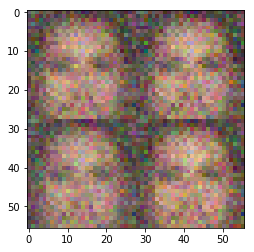

Epoch 0/1 -  Discriminator loss: 0.3578 -  Generator loss: 3.9559 -  D + G loss: 4.3137
Epoch 0/1 -  Discriminator loss: 0.3563 -  Generator loss: 4.1539 -  D + G loss: 4.5102
Epoch 0/1 -  Discriminator loss: 0.3717 -  Generator loss: 3.3991 -  D + G loss: 3.7707
Epoch 0/1 -  Discriminator loss: 0.3702 -  Generator loss: 4.2657 -  D + G loss: 4.6360
Epoch 0/1 -  Discriminator loss: 0.3641 -  Generator loss: 3.5881 -  D + G loss: 3.9522
Epoch 0/1 -  Discriminator loss: 0.3730 -  Generator loss: 3.7226 -  D + G loss: 4.0956
Epoch 0/1 -  Discriminator loss: 0.3601 -  Generator loss: 3.9312 -  D + G loss: 4.2913
Epoch 0/1 -  Discriminator loss: 0.3642 -  Generator loss: 3.6152 -  D + G loss: 3.9794
Epoch 0/1 -  Discriminator loss: 0.3644 -  Generator loss: 4.2004 -  D + G loss: 4.5648
Epoch 0/1 -  Discriminator loss: 0.3782 -  Generator loss: 3.3098 -  D + G loss: 3.6880
Epoch 0/1 -  Discriminator loss: 0.3716 -  Generator loss: 4.4436 -  D + G loss: 4.8152
Epoch 0/1 -  Discriminator loss:

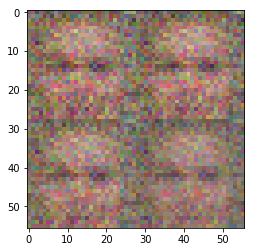

Epoch 0/1 -  Discriminator loss: 0.3803 -  Generator loss: 3.3099 -  D + G loss: 3.6902
Epoch 0/1 -  Discriminator loss: 0.3721 -  Generator loss: 4.1326 -  D + G loss: 4.5047
Epoch 0/1 -  Discriminator loss: 0.3850 -  Generator loss: 3.3509 -  D + G loss: 3.7359
Epoch 0/1 -  Discriminator loss: 0.3698 -  Generator loss: 3.7889 -  D + G loss: 4.1587
Epoch 0/1 -  Discriminator loss: 0.3712 -  Generator loss: 3.7686 -  D + G loss: 4.1398
Epoch 0/1 -  Discriminator loss: 0.3725 -  Generator loss: 3.3091 -  D + G loss: 3.6816
Epoch 0/1 -  Discriminator loss: 0.3715 -  Generator loss: 4.5989 -  D + G loss: 4.9704
Epoch 0/1 -  Discriminator loss: 0.3658 -  Generator loss: 4.1115 -  D + G loss: 4.4773
Epoch 0/1 -  Discriminator loss: 0.3821 -  Generator loss: 3.2432 -  D + G loss: 3.6253
Epoch 0/1 -  Discriminator loss: 0.3683 -  Generator loss: 4.5123 -  D + G loss: 4.8806
Epoch 0/1 -  Discriminator loss: 0.3742 -  Generator loss: 3.5200 -  D + G loss: 3.8942
Epoch 0/1 -  Discriminator loss:

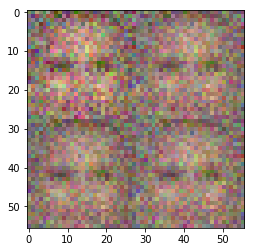

Epoch 0/1 -  Discriminator loss: 0.3648 -  Generator loss: 3.7384 -  D + G loss: 4.1032
Epoch 0/1 -  Discriminator loss: 0.3581 -  Generator loss: 4.2361 -  D + G loss: 4.5943
Epoch 0/1 -  Discriminator loss: 0.3637 -  Generator loss: 3.6875 -  D + G loss: 4.0512
Epoch 0/1 -  Discriminator loss: 0.3522 -  Generator loss: 4.3375 -  D + G loss: 4.6897
Epoch 0/1 -  Discriminator loss: 0.3541 -  Generator loss: 3.9786 -  D + G loss: 4.3328
Epoch 0/1 -  Discriminator loss: 0.3504 -  Generator loss: 4.2686 -  D + G loss: 4.6190
Epoch 0/1 -  Discriminator loss: 0.3577 -  Generator loss: 3.9652 -  D + G loss: 4.3228
Epoch 0/1 -  Discriminator loss: 0.3572 -  Generator loss: 3.9976 -  D + G loss: 4.3548
Epoch 0/1 -  Discriminator loss: 0.3598 -  Generator loss: 4.1496 -  D + G loss: 4.5094
Epoch 0/1 -  Discriminator loss: 0.3570 -  Generator loss: 3.7445 -  D + G loss: 4.1016
Epoch 0/1 -  Discriminator loss: 0.3622 -  Generator loss: 3.8820 -  D + G loss: 4.2442
Epoch 0/1 -  Discriminator loss:

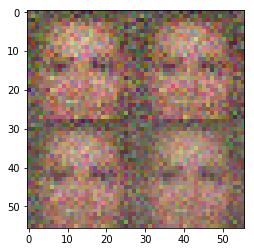

Epoch 0/1 -  Discriminator loss: 0.3601 -  Generator loss: 4.0663 -  D + G loss: 4.4264
Epoch 0/1 -  Discriminator loss: 0.3556 -  Generator loss: 4.1301 -  D + G loss: 4.4857
Epoch 0/1 -  Discriminator loss: 0.3564 -  Generator loss: 3.8533 -  D + G loss: 4.2096
Epoch 0/1 -  Discriminator loss: 0.3546 -  Generator loss: 4.2656 -  D + G loss: 4.6203
Epoch 0/1 -  Discriminator loss: 0.3584 -  Generator loss: 3.7553 -  D + G loss: 4.1137
Epoch 0/1 -  Discriminator loss: 0.3549 -  Generator loss: 4.2890 -  D + G loss: 4.6439
Epoch 0/1 -  Discriminator loss: 0.3611 -  Generator loss: 3.5905 -  D + G loss: 3.9516
Epoch 0/1 -  Discriminator loss: 0.3665 -  Generator loss: 4.7706 -  D + G loss: 5.1371
Epoch 0/1 -  Discriminator loss: 0.3717 -  Generator loss: 3.4786 -  D + G loss: 3.8503
Epoch 0/1 -  Discriminator loss: 0.3626 -  Generator loss: 4.8909 -  D + G loss: 5.2535
Epoch 0/1 -  Discriminator loss: 0.3483 -  Generator loss: 4.3387 -  D + G loss: 4.6870
Epoch 0/1 -  Discriminator loss:

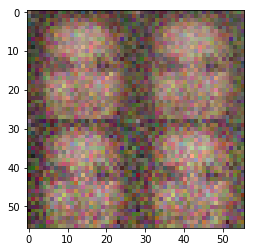

Epoch 0/1 -  Discriminator loss: 0.3486 -  Generator loss: 4.0318 -  D + G loss: 4.3804
Epoch 0/1 -  Discriminator loss: 0.3486 -  Generator loss: 4.3321 -  D + G loss: 4.6807
Epoch 0/1 -  Discriminator loss: 0.3483 -  Generator loss: 4.4353 -  D + G loss: 4.7835
Epoch 0/1 -  Discriminator loss: 0.3475 -  Generator loss: 4.2644 -  D + G loss: 4.6119
Epoch 0/1 -  Discriminator loss: 0.3516 -  Generator loss: 4.2939 -  D + G loss: 4.6455
Epoch 0/1 -  Discriminator loss: 0.3624 -  Generator loss: 3.5563 -  D + G loss: 3.9187
Epoch 0/1 -  Discriminator loss: 0.3733 -  Generator loss: 5.0150 -  D + G loss: 5.3883
Epoch 0/1 -  Discriminator loss: 0.3580 -  Generator loss: 3.7746 -  D + G loss: 4.1326
Epoch 0/1 -  Discriminator loss: 0.3494 -  Generator loss: 4.3862 -  D + G loss: 4.7357
Epoch 0/1 -  Discriminator loss: 0.3569 -  Generator loss: 3.8267 -  D + G loss: 4.1836
Epoch 0/1 -  Discriminator loss: 0.3547 -  Generator loss: 4.6533 -  D + G loss: 5.0081
Epoch 0/1 -  Discriminator loss:

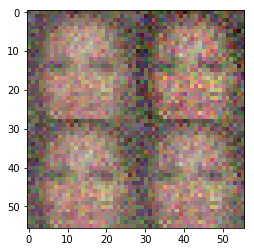

Epoch 0/1 -  Discriminator loss: 0.3685 -  Generator loss: 4.6529 -  D + G loss: 5.0214
Epoch 0/1 -  Discriminator loss: 0.3778 -  Generator loss: 3.4212 -  D + G loss: 3.7990
Epoch 0/1 -  Discriminator loss: 0.3832 -  Generator loss: 5.3269 -  D + G loss: 5.7100
Epoch 0/1 -  Discriminator loss: 0.3620 -  Generator loss: 3.7962 -  D + G loss: 4.1582
Epoch 0/1 -  Discriminator loss: 0.3615 -  Generator loss: 4.6164 -  D + G loss: 4.9779
Epoch 0/1 -  Discriminator loss: 0.3824 -  Generator loss: 3.2732 -  D + G loss: 3.6556
Epoch 0/1 -  Discriminator loss: 0.4098 -  Generator loss: 5.8008 -  D + G loss: 6.2106
Epoch 0/1 -  Discriminator loss: 0.4044 -  Generator loss: 3.1550 -  D + G loss: 3.5595
Epoch 0/1 -  Discriminator loss: 0.3926 -  Generator loss: 5.7479 -  D + G loss: 6.1406
Epoch 0/1 -  Discriminator loss: 0.3534 -  Generator loss: 4.0104 -  D + G loss: 4.3638
Epoch 0/1 -  Discriminator loss: 0.3633 -  Generator loss: 3.4875 -  D + G loss: 3.8508
Epoch 0/1 -  Discriminator loss:

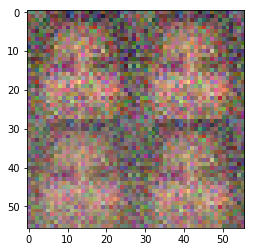

Epoch 0/1 -  Discriminator loss: 0.3582 -  Generator loss: 4.2238 -  D + G loss: 4.5819
Epoch 0/1 -  Discriminator loss: 0.4118 -  Generator loss: 2.8703 -  D + G loss: 3.2821
Epoch 0/1 -  Discriminator loss: 0.5182 -  Generator loss: 7.8115 -  D + G loss: 8.3297
Epoch 0/1 -  Discriminator loss: 0.3705 -  Generator loss: 4.4191 -  D + G loss: 4.7896
Epoch 0/1 -  Discriminator loss: 0.3935 -  Generator loss: 3.0477 -  D + G loss: 3.4412
Epoch 0/1 -  Discriminator loss: 0.4043 -  Generator loss: 5.5885 -  D + G loss: 5.9929
Epoch 0/1 -  Discriminator loss: 0.3546 -  Generator loss: 4.3610 -  D + G loss: 4.7156
Epoch 0/1 -  Discriminator loss: 0.4333 -  Generator loss: 2.5026 -  D + G loss: 2.9359
Epoch 0/1 -  Discriminator loss: 0.4661 -  Generator loss: 6.2818 -  D + G loss: 6.7479
Epoch 0/1 -  Discriminator loss: 0.3501 -  Generator loss: 4.3734 -  D + G loss: 4.7235
Epoch 0/1 -  Discriminator loss: 0.3811 -  Generator loss: 3.2120 -  D + G loss: 3.5931
Epoch 0/1 -  Discriminator loss:

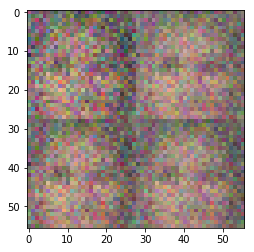

Epoch 0/1 -  Discriminator loss: 0.3490 -  Generator loss: 4.3258 -  D + G loss: 4.6748
Epoch 0/1 -  Discriminator loss: 0.3474 -  Generator loss: 4.3422 -  D + G loss: 4.6896
Epoch 0/1 -  Discriminator loss: 0.3470 -  Generator loss: 4.4186 -  D + G loss: 4.7656
Epoch 0/1 -  Discriminator loss: 0.3684 -  Generator loss: 3.6224 -  D + G loss: 3.9908
Epoch 0/1 -  Discriminator loss: 0.3938 -  Generator loss: 5.3998 -  D + G loss: 5.7935
Epoch 0/1 -  Discriminator loss: 0.3537 -  Generator loss: 3.9956 -  D + G loss: 4.3493
Epoch 0/1 -  Discriminator loss: 0.3481 -  Generator loss: 4.2185 -  D + G loss: 4.5666
Epoch 0/1 -  Discriminator loss: 0.3524 -  Generator loss: 4.0365 -  D + G loss: 4.3889
Epoch 0/1 -  Discriminator loss: 0.3506 -  Generator loss: 4.4228 -  D + G loss: 4.7734
Epoch 0/1 -  Discriminator loss: 0.3538 -  Generator loss: 3.8179 -  D + G loss: 4.1717
Epoch 0/1 -  Discriminator loss: 0.3516 -  Generator loss: 4.4289 -  D + G loss: 4.7805
Epoch 0/1 -  Discriminator loss:

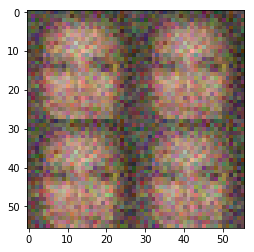

Epoch 0/1 -  Discriminator loss: 0.4500 -  Generator loss: 6.9682 -  D + G loss: 7.4181
Epoch 0/1 -  Discriminator loss: 0.3488 -  Generator loss: 4.2121 -  D + G loss: 4.5609
Epoch 0/1 -  Discriminator loss: 0.3739 -  Generator loss: 3.4347 -  D + G loss: 3.8087
Epoch 0/1 -  Discriminator loss: 0.3699 -  Generator loss: 5.2809 -  D + G loss: 5.6508
Epoch 0/1 -  Discriminator loss: 0.3521 -  Generator loss: 3.9032 -  D + G loss: 4.2553
Epoch 0/1 -  Discriminator loss: 0.3511 -  Generator loss: 4.0405 -  D + G loss: 4.3916
Epoch 0/1 -  Discriminator loss: 0.3543 -  Generator loss: 4.6646 -  D + G loss: 5.0188
Epoch 0/1 -  Discriminator loss: 0.3451 -  Generator loss: 4.3092 -  D + G loss: 4.6543
Epoch 0/1 -  Discriminator loss: 0.3584 -  Generator loss: 3.6624 -  D + G loss: 4.0209
Epoch 0/1 -  Discriminator loss: 0.3646 -  Generator loss: 4.6211 -  D + G loss: 4.9857
Epoch 0/1 -  Discriminator loss: 0.3581 -  Generator loss: 3.7538 -  D + G loss: 4.1119
Epoch 0/1 -  Discriminator loss:

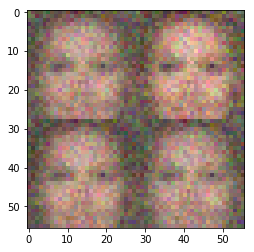

Epoch 0/1 -  Discriminator loss: 0.3494 -  Generator loss: 5.0015 -  D + G loss: 5.3509
Epoch 0/1 -  Discriminator loss: 0.3534 -  Generator loss: 3.9670 -  D + G loss: 4.3204
Epoch 0/1 -  Discriminator loss: 0.3555 -  Generator loss: 4.3200 -  D + G loss: 4.6756
Epoch 0/1 -  Discriminator loss: 0.3489 -  Generator loss: 4.5828 -  D + G loss: 4.9317
Epoch 0/1 -  Discriminator loss: 0.3601 -  Generator loss: 3.7248 -  D + G loss: 4.0849
Epoch 0/1 -  Discriminator loss: 0.3608 -  Generator loss: 5.1286 -  D + G loss: 5.4893
Epoch 0/1 -  Discriminator loss: 0.3493 -  Generator loss: 4.0045 -  D + G loss: 4.3538
Epoch 0/1 -  Discriminator loss: 0.3471 -  Generator loss: 4.3855 -  D + G loss: 4.7325
Epoch 0/1 -  Discriminator loss: 0.3451 -  Generator loss: 4.5505 -  D + G loss: 4.8956
Epoch 0/1 -  Discriminator loss: 0.3462 -  Generator loss: 4.4174 -  D + G loss: 4.7635
Epoch 0/1 -  Discriminator loss: 0.3507 -  Generator loss: 4.1927 -  D + G loss: 4.5435
Epoch 0/1 -  Discriminator loss:

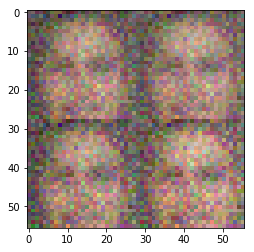

Epoch 0/1 -  Discriminator loss: 0.3579 -  Generator loss: 4.6177 -  D + G loss: 4.9756
Epoch 0/1 -  Discriminator loss: 0.3636 -  Generator loss: 3.5801 -  D + G loss: 3.9437
Epoch 0/1 -  Discriminator loss: 0.3543 -  Generator loss: 4.6072 -  D + G loss: 4.9614
Epoch 0/1 -  Discriminator loss: 0.3494 -  Generator loss: 4.2607 -  D + G loss: 4.6102
Epoch 0/1 -  Discriminator loss: 0.3788 -  Generator loss: 3.2600 -  D + G loss: 3.6388
Epoch 0/1 -  Discriminator loss: 0.3901 -  Generator loss: 5.5272 -  D + G loss: 5.9174
Epoch 0/1 -  Discriminator loss: 0.3510 -  Generator loss: 4.2444 -  D + G loss: 4.5955
Epoch 0/1 -  Discriminator loss: 0.3875 -  Generator loss: 3.1961 -  D + G loss: 3.5836
Epoch 0/1 -  Discriminator loss: 0.3713 -  Generator loss: 5.4297 -  D + G loss: 5.8010
Epoch 0/1 -  Discriminator loss: 0.3531 -  Generator loss: 4.3147 -  D + G loss: 4.6678
Epoch 0/1 -  Discriminator loss: 0.3653 -  Generator loss: 3.5369 -  D + G loss: 3.9022
Epoch 0/1 -  Discriminator loss:

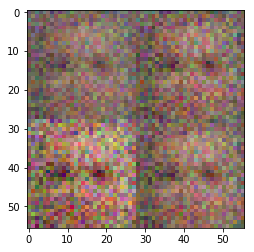

Epoch 0/1 -  Discriminator loss: 0.3519 -  Generator loss: 4.3285 -  D + G loss: 4.6804
Epoch 0/1 -  Discriminator loss: 0.3486 -  Generator loss: 4.4220 -  D + G loss: 4.7706
Epoch 0/1 -  Discriminator loss: 0.3489 -  Generator loss: 4.4066 -  D + G loss: 4.7555
Epoch 0/1 -  Discriminator loss: 0.3518 -  Generator loss: 4.2608 -  D + G loss: 4.6127
Epoch 0/1 -  Discriminator loss: 0.3554 -  Generator loss: 3.8670 -  D + G loss: 4.2224
Epoch 0/1 -  Discriminator loss: 0.3484 -  Generator loss: 4.8465 -  D + G loss: 5.1949
Epoch 0/1 -  Discriminator loss: 0.3504 -  Generator loss: 4.3803 -  D + G loss: 4.7307
Epoch 0/1 -  Discriminator loss: 0.3579 -  Generator loss: 4.0918 -  D + G loss: 4.4497
Epoch 0/1 -  Discriminator loss: 0.3575 -  Generator loss: 4.1327 -  D + G loss: 4.4903
Epoch 0/1 -  Discriminator loss: 0.3549 -  Generator loss: 4.2745 -  D + G loss: 4.6294
Epoch 0/1 -  Discriminator loss: 0.3551 -  Generator loss: 4.1605 -  D + G loss: 4.5156
Epoch 0/1 -  Discriminator loss:

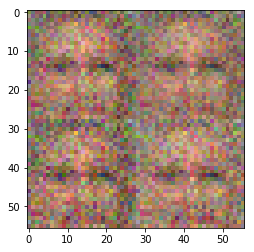

Epoch 0/1 -  Discriminator loss: 0.3566 -  Generator loss: 4.0497 -  D + G loss: 4.4063
Epoch 0/1 -  Discriminator loss: 0.3629 -  Generator loss: 3.9306 -  D + G loss: 4.2935
Epoch 0/1 -  Discriminator loss: 0.3583 -  Generator loss: 4.4322 -  D + G loss: 4.7905
Epoch 0/1 -  Discriminator loss: 0.3604 -  Generator loss: 3.7048 -  D + G loss: 4.0652
Epoch 0/1 -  Discriminator loss: 0.3557 -  Generator loss: 4.1135 -  D + G loss: 4.4692
Epoch 0/1 -  Discriminator loss: 0.3602 -  Generator loss: 4.0464 -  D + G loss: 4.4066
Epoch 0/1 -  Discriminator loss: 0.3594 -  Generator loss: 3.8182 -  D + G loss: 4.1776
Epoch 0/1 -  Discriminator loss: 0.3574 -  Generator loss: 3.9668 -  D + G loss: 4.3242
Epoch 0/1 -  Discriminator loss: 0.3589 -  Generator loss: 4.3691 -  D + G loss: 4.7279
Epoch 0/1 -  Discriminator loss: 0.3685 -  Generator loss: 3.6466 -  D + G loss: 4.0152
Epoch 0/1 -  Discriminator loss: 0.3694 -  Generator loss: 3.9123 -  D + G loss: 4.2816
Epoch 0/1 -  Discriminator loss:

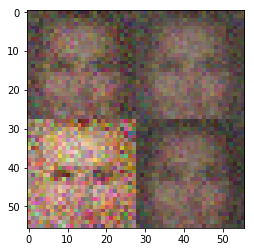

Epoch 0/1 -  Discriminator loss: 0.3735 -  Generator loss: 3.5015 -  D + G loss: 3.8749
Epoch 0/1 -  Discriminator loss: 0.3641 -  Generator loss: 4.2504 -  D + G loss: 4.6145
Epoch 0/1 -  Discriminator loss: 0.3766 -  Generator loss: 3.3560 -  D + G loss: 3.7326
Epoch 0/1 -  Discriminator loss: 0.3621 -  Generator loss: 4.1372 -  D + G loss: 4.4993
Epoch 0/1 -  Discriminator loss: 0.3818 -  Generator loss: 3.1092 -  D + G loss: 3.4910
Epoch 0/1 -  Discriminator loss: 0.3744 -  Generator loss: 4.7473 -  D + G loss: 5.1217
Epoch 0/1 -  Discriminator loss: 0.3668 -  Generator loss: 3.5466 -  D + G loss: 3.9134
Epoch 0/1 -  Discriminator loss: 0.3749 -  Generator loss: 4.5494 -  D + G loss: 4.9242
Epoch 0/1 -  Discriminator loss: 0.3908 -  Generator loss: 3.0448 -  D + G loss: 3.4356
Epoch 0/1 -  Discriminator loss: 0.3992 -  Generator loss: 5.1638 -  D + G loss: 5.5630
Epoch 0/1 -  Discriminator loss: 0.3803 -  Generator loss: 3.3163 -  D + G loss: 3.6966
Epoch 0/1 -  Discriminator loss:

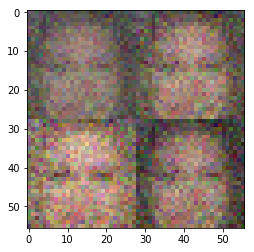

Epoch 0/1 -  Discriminator loss: 0.3553 -  Generator loss: 4.4901 -  D + G loss: 4.8454
Epoch 0/1 -  Discriminator loss: 0.3809 -  Generator loss: 3.1961 -  D + G loss: 3.5770
Epoch 0/1 -  Discriminator loss: 0.3715 -  Generator loss: 4.8951 -  D + G loss: 5.2665
Epoch 0/1 -  Discriminator loss: 0.3676 -  Generator loss: 3.5471 -  D + G loss: 3.9147
Epoch 0/1 -  Discriminator loss: 0.3575 -  Generator loss: 4.0324 -  D + G loss: 4.3899
Epoch 0/1 -  Discriminator loss: 0.3555 -  Generator loss: 4.3968 -  D + G loss: 4.7523
Epoch 0/1 -  Discriminator loss: 0.3830 -  Generator loss: 3.1353 -  D + G loss: 3.5184
Epoch 0/1 -  Discriminator loss: 0.3933 -  Generator loss: 5.0510 -  D + G loss: 5.4443
Epoch 0/1 -  Discriminator loss: 0.3768 -  Generator loss: 3.2261 -  D + G loss: 3.6029
Epoch 0/1 -  Discriminator loss: 0.3559 -  Generator loss: 4.2116 -  D + G loss: 4.5675
Epoch 0/1 -  Discriminator loss: 0.3543 -  Generator loss: 4.2312 -  D + G loss: 4.5854
Epoch 0/1 -  Discriminator loss:

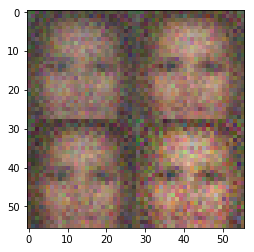

Epoch 0/1 -  Discriminator loss: 0.3572 -  Generator loss: 4.1010 -  D + G loss: 4.4582
Epoch 0/1 -  Discriminator loss: 0.3623 -  Generator loss: 3.6435 -  D + G loss: 4.0059
Epoch 0/1 -  Discriminator loss: 0.3758 -  Generator loss: 4.9341 -  D + G loss: 5.3100
Epoch 0/1 -  Discriminator loss: 0.3968 -  Generator loss: 3.0525 -  D + G loss: 3.4493
Epoch 0/1 -  Discriminator loss: 0.3881 -  Generator loss: 5.4078 -  D + G loss: 5.7958
Epoch 0/1 -  Discriminator loss: 0.4080 -  Generator loss: 3.0434 -  D + G loss: 3.4514
Epoch 0/1 -  Discriminator loss: 0.3806 -  Generator loss: 5.6921 -  D + G loss: 6.0727
Epoch 0/1 -  Discriminator loss: 0.3473 -  Generator loss: 4.2317 -  D + G loss: 4.5790
Epoch 0/1 -  Discriminator loss: 0.3535 -  Generator loss: 3.8451 -  D + G loss: 4.1986
Epoch 0/1 -  Discriminator loss: 0.3519 -  Generator loss: 4.7631 -  D + G loss: 5.1150
Epoch 0/1 -  Discriminator loss: 0.3486 -  Generator loss: 4.4960 -  D + G loss: 4.8446
Epoch 0/1 -  Discriminator loss:

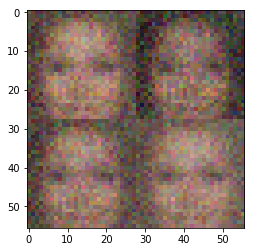

Epoch 0/1 -  Discriminator loss: 0.3475 -  Generator loss: 4.6992 -  D + G loss: 5.0467
Epoch 0/1 -  Discriminator loss: 0.3563 -  Generator loss: 4.0331 -  D + G loss: 4.3893
Epoch 0/1 -  Discriminator loss: 0.3547 -  Generator loss: 4.0914 -  D + G loss: 4.4461
Epoch 0/1 -  Discriminator loss: 0.3477 -  Generator loss: 4.3477 -  D + G loss: 4.6954
Epoch 0/1 -  Discriminator loss: 0.3524 -  Generator loss: 4.2421 -  D + G loss: 4.5946
Epoch 0/1 -  Discriminator loss: 0.3492 -  Generator loss: 4.6185 -  D + G loss: 4.9677
Epoch 0/1 -  Discriminator loss: 0.3473 -  Generator loss: 4.3478 -  D + G loss: 4.6951
Epoch 0/1 -  Discriminator loss: 0.3469 -  Generator loss: 4.3273 -  D + G loss: 4.6742
Epoch 0/1 -  Discriminator loss: 0.3494 -  Generator loss: 4.1730 -  D + G loss: 4.5224
Epoch 0/1 -  Discriminator loss: 0.3503 -  Generator loss: 4.5763 -  D + G loss: 4.9266
Epoch 0/1 -  Discriminator loss: 0.3456 -  Generator loss: 4.4431 -  D + G loss: 4.7887
Epoch 0/1 -  Discriminator loss:

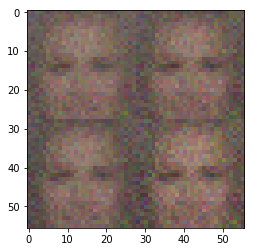

Epoch 0/1 -  Discriminator loss: 0.3506 -  Generator loss: 4.2338 -  D + G loss: 4.5844
Epoch 0/1 -  Discriminator loss: 0.3563 -  Generator loss: 3.9284 -  D + G loss: 4.2848
Epoch 0/1 -  Discriminator loss: 0.3547 -  Generator loss: 4.8073 -  D + G loss: 5.1621
Epoch 0/1 -  Discriminator loss: 0.3616 -  Generator loss: 3.8559 -  D + G loss: 4.2174
Epoch 0/1 -  Discriminator loss: 0.3605 -  Generator loss: 4.6938 -  D + G loss: 5.0543
Epoch 0/1 -  Discriminator loss: 0.3986 -  Generator loss: 3.2082 -  D + G loss: 3.6068
Epoch 0/1 -  Discriminator loss: 0.4271 -  Generator loss: 6.5271 -  D + G loss: 6.9543
Epoch 0/1 -  Discriminator loss: 0.3483 -  Generator loss: 4.3907 -  D + G loss: 4.7390
Epoch 0/1 -  Discriminator loss: 0.3667 -  Generator loss: 3.7080 -  D + G loss: 4.0747
Epoch 0/1 -  Discriminator loss: 0.3504 -  Generator loss: 4.8594 -  D + G loss: 5.2098
Epoch 0/1 -  Discriminator loss: 0.3557 -  Generator loss: 4.5469 -  D + G loss: 4.9026
Epoch 0/1 -  Discriminator loss:

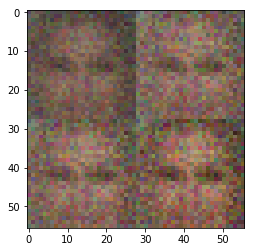

Epoch 0/1 -  Discriminator loss: 0.3566 -  Generator loss: 4.7318 -  D + G loss: 5.0884
Epoch 0/1 -  Discriminator loss: 0.3620 -  Generator loss: 3.6559 -  D + G loss: 4.0179
Epoch 0/1 -  Discriminator loss: 0.3563 -  Generator loss: 4.8008 -  D + G loss: 5.1571
Epoch 0/1 -  Discriminator loss: 0.3540 -  Generator loss: 4.0768 -  D + G loss: 4.4308
Epoch 0/1 -  Discriminator loss: 0.3496 -  Generator loss: 4.2278 -  D + G loss: 4.5774
Epoch 0/1 -  Discriminator loss: 0.3551 -  Generator loss: 4.4134 -  D + G loss: 4.7685
Epoch 0/1 -  Discriminator loss: 0.3595 -  Generator loss: 3.6608 -  D + G loss: 4.0204
Epoch 0/1 -  Discriminator loss: 0.3516 -  Generator loss: 4.7703 -  D + G loss: 5.1218
Epoch 0/1 -  Discriminator loss: 0.3599 -  Generator loss: 4.0091 -  D + G loss: 4.3689
Epoch 0/1 -  Discriminator loss: 0.3573 -  Generator loss: 3.8809 -  D + G loss: 4.2382
Epoch 0/1 -  Discriminator loss: 0.3531 -  Generator loss: 4.4423 -  D + G loss: 4.7954
Epoch 0/1 -  Discriminator loss:

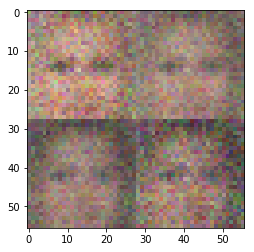

Epoch 0/1 -  Discriminator loss: 0.3494 -  Generator loss: 4.4380 -  D + G loss: 4.7874
Epoch 0/1 -  Discriminator loss: 0.3532 -  Generator loss: 4.4201 -  D + G loss: 4.7734
Epoch 0/1 -  Discriminator loss: 0.3437 -  Generator loss: 4.4669 -  D + G loss: 4.8107
Epoch 0/1 -  Discriminator loss: 0.3512 -  Generator loss: 4.1341 -  D + G loss: 4.4853
Epoch 0/1 -  Discriminator loss: 0.3477 -  Generator loss: 4.6413 -  D + G loss: 4.9890
Epoch 0/1 -  Discriminator loss: 0.3538 -  Generator loss: 4.0357 -  D + G loss: 4.3894
Epoch 0/1 -  Discriminator loss: 0.3491 -  Generator loss: 4.6446 -  D + G loss: 4.9937
Epoch 0/1 -  Discriminator loss: 0.3498 -  Generator loss: 4.2897 -  D + G loss: 4.6395
Epoch 0/1 -  Discriminator loss: 0.3508 -  Generator loss: 4.0861 -  D + G loss: 4.4369
Epoch 0/1 -  Discriminator loss: 0.3625 -  Generator loss: 4.1979 -  D + G loss: 4.5604
Epoch 0/1 -  Discriminator loss: 0.3515 -  Generator loss: 4.4684 -  D + G loss: 4.8199
Epoch 0/1 -  Discriminator loss:

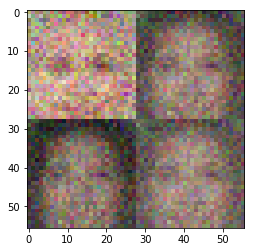

Epoch 0/1 -  Discriminator loss: 0.3528 -  Generator loss: 4.0955 -  D + G loss: 4.4483
Epoch 0/1 -  Discriminator loss: 0.3479 -  Generator loss: 4.7435 -  D + G loss: 5.0914
Epoch 0/1 -  Discriminator loss: 0.3497 -  Generator loss: 4.2997 -  D + G loss: 4.6493
Epoch 0/1 -  Discriminator loss: 0.3601 -  Generator loss: 3.6640 -  D + G loss: 4.0241
Epoch 0/1 -  Discriminator loss: 0.3576 -  Generator loss: 4.9950 -  D + G loss: 5.3526
Epoch 0/1 -  Discriminator loss: 0.3562 -  Generator loss: 3.8871 -  D + G loss: 4.2433
Epoch 0/1 -  Discriminator loss: 0.3474 -  Generator loss: 4.6988 -  D + G loss: 5.0462
Epoch 0/1 -  Discriminator loss: 0.3509 -  Generator loss: 4.3587 -  D + G loss: 4.7096
Epoch 0/1 -  Discriminator loss: 0.3482 -  Generator loss: 4.3158 -  D + G loss: 4.6640
Epoch 0/1 -  Discriminator loss: 0.3555 -  Generator loss: 4.1878 -  D + G loss: 4.5432
Epoch 0/1 -  Discriminator loss: 0.3571 -  Generator loss: 3.8942 -  D + G loss: 4.2512
Epoch 0/1 -  Discriminator loss:

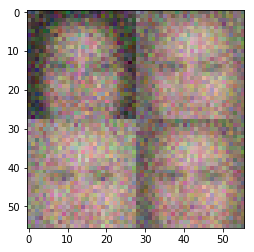

Epoch 0/1 -  Discriminator loss: 0.4268 -  Generator loss: 8.0459 -  D + G loss: 8.4727
Epoch 0/1 -  Discriminator loss: 0.3498 -  Generator loss: 4.5435 -  D + G loss: 4.8932
Epoch 0/1 -  Discriminator loss: 0.3653 -  Generator loss: 3.6402 -  D + G loss: 4.0055
Epoch 0/1 -  Discriminator loss: 0.3479 -  Generator loss: 5.3135 -  D + G loss: 5.6613
Epoch 0/1 -  Discriminator loss: 0.3495 -  Generator loss: 4.5457 -  D + G loss: 4.8952
Epoch 0/1 -  Discriminator loss: 0.3586 -  Generator loss: 3.8114 -  D + G loss: 4.1699
Epoch 0/1 -  Discriminator loss: 0.3612 -  Generator loss: 4.4793 -  D + G loss: 4.8405
Epoch 0/1 -  Discriminator loss: 0.3680 -  Generator loss: 3.6386 -  D + G loss: 4.0066
Epoch 0/1 -  Discriminator loss: 0.3662 -  Generator loss: 4.0409 -  D + G loss: 4.4071
Epoch 0/1 -  Discriminator loss: 0.3551 -  Generator loss: 4.4649 -  D + G loss: 4.8200
Epoch 0/1 -  Discriminator loss: 0.3635 -  Generator loss: 3.7213 -  D + G loss: 4.0848
Epoch 0/1 -  Discriminator loss:

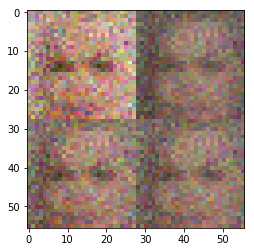

Epoch 0/1 -  Discriminator loss: 0.3467 -  Generator loss: 4.4674 -  D + G loss: 4.8141
Epoch 0/1 -  Discriminator loss: 0.3554 -  Generator loss: 4.0640 -  D + G loss: 4.4194
Epoch 0/1 -  Discriminator loss: 0.3581 -  Generator loss: 3.9438 -  D + G loss: 4.3020
Epoch 0/1 -  Discriminator loss: 0.3530 -  Generator loss: 4.3537 -  D + G loss: 4.7067
Epoch 0/1 -  Discriminator loss: 0.3539 -  Generator loss: 4.8727 -  D + G loss: 5.2266
Epoch 0/1 -  Discriminator loss: 0.3811 -  Generator loss: 3.1751 -  D + G loss: 3.5562
Epoch 0/1 -  Discriminator loss: 0.3661 -  Generator loss: 5.4427 -  D + G loss: 5.8088
Epoch 0/1 -  Discriminator loss: 0.3492 -  Generator loss: 4.6485 -  D + G loss: 4.9978
Epoch 0/1 -  Discriminator loss: 0.3492 -  Generator loss: 4.1492 -  D + G loss: 4.4984
Epoch 0/1 -  Discriminator loss: 0.3562 -  Generator loss: 4.2127 -  D + G loss: 4.5689
Epoch 0/1 -  Discriminator loss: 0.3502 -  Generator loss: 4.3498 -  D + G loss: 4.7000
Epoch 0/1 -  Discriminator loss:

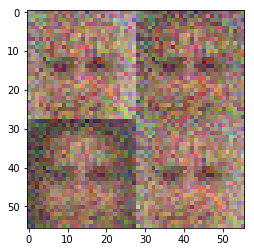

Epoch 0/1 -  Discriminator loss: 0.3664 -  Generator loss: 3.9668 -  D + G loss: 4.3333
Epoch 0/1 -  Discriminator loss: 0.3681 -  Generator loss: 4.7818 -  D + G loss: 5.1499
Epoch 0/1 -  Discriminator loss: 0.3726 -  Generator loss: 3.9316 -  D + G loss: 4.3043
Epoch 0/1 -  Discriminator loss: 0.3471 -  Generator loss: 5.1077 -  D + G loss: 5.4548
Epoch 0/1 -  Discriminator loss: 0.3488 -  Generator loss: 4.8109 -  D + G loss: 5.1598
Epoch 0/1 -  Discriminator loss: 0.3629 -  Generator loss: 3.7822 -  D + G loss: 4.1452
Epoch 0/1 -  Discriminator loss: 0.3523 -  Generator loss: 4.6655 -  D + G loss: 5.0178
Epoch 0/1 -  Discriminator loss: 0.3509 -  Generator loss: 4.6254 -  D + G loss: 4.9764
Epoch 0/1 -  Discriminator loss: 0.3530 -  Generator loss: 4.3001 -  D + G loss: 4.6531
Epoch 0/1 -  Discriminator loss: 0.3690 -  Generator loss: 4.2146 -  D + G loss: 4.5836
Epoch 0/1 -  Discriminator loss: 0.3637 -  Generator loss: 5.7807 -  D + G loss: 6.1443
Epoch 0/1 -  Discriminator loss:

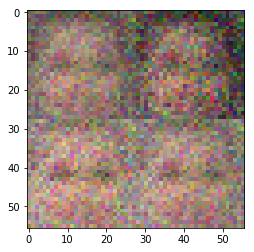

Epoch 0/1 -  Discriminator loss: 0.3562 -  Generator loss: 4.3246 -  D + G loss: 4.6808
Epoch 0/1 -  Discriminator loss: 0.3638 -  Generator loss: 3.7656 -  D + G loss: 4.1294
Epoch 0/1 -  Discriminator loss: 0.3640 -  Generator loss: 4.9211 -  D + G loss: 5.2851
Epoch 0/1 -  Discriminator loss: 0.3699 -  Generator loss: 3.6269 -  D + G loss: 3.9967
Epoch 0/1 -  Discriminator loss: 0.3501 -  Generator loss: 4.9325 -  D + G loss: 5.2826
Epoch 0/1 -  Discriminator loss: 0.3548 -  Generator loss: 4.2444 -  D + G loss: 4.5992
Epoch 0/1 -  Discriminator loss: 0.3634 -  Generator loss: 3.5911 -  D + G loss: 3.9545
Epoch 0/1 -  Discriminator loss: 0.3651 -  Generator loss: 4.9488 -  D + G loss: 5.3139
Epoch 0/1 -  Discriminator loss: 0.3669 -  Generator loss: 3.8281 -  D + G loss: 4.1950
Epoch 0/1 -  Discriminator loss: 0.3561 -  Generator loss: 4.7322 -  D + G loss: 5.0883
Epoch 0/1 -  Discriminator loss: 0.3756 -  Generator loss: 3.4284 -  D + G loss: 3.8040
Epoch 0/1 -  Discriminator loss:

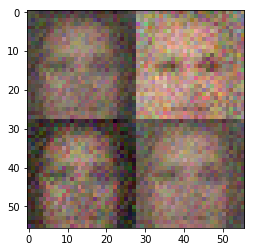

Epoch 0/1 -  Discriminator loss: 0.3685 -  Generator loss: 3.4712 -  D + G loss: 3.8397
Epoch 0/1 -  Discriminator loss: 0.3674 -  Generator loss: 5.2826 -  D + G loss: 5.6500
Epoch 0/1 -  Discriminator loss: 0.3675 -  Generator loss: 3.4096 -  D + G loss: 3.7771
Epoch 0/1 -  Discriminator loss: 0.3590 -  Generator loss: 5.0611 -  D + G loss: 5.4201
Epoch 0/1 -  Discriminator loss: 0.3482 -  Generator loss: 4.2393 -  D + G loss: 4.5875
Epoch 0/1 -  Discriminator loss: 0.3560 -  Generator loss: 3.9340 -  D + G loss: 4.2900
Epoch 0/1 -  Discriminator loss: 0.3497 -  Generator loss: 4.3706 -  D + G loss: 4.7203
Epoch 0/1 -  Discriminator loss: 0.3568 -  Generator loss: 3.9604 -  D + G loss: 4.3172
Epoch 0/1 -  Discriminator loss: 0.3515 -  Generator loss: 4.3804 -  D + G loss: 4.7319
Epoch 0/1 -  Discriminator loss: 0.3457 -  Generator loss: 4.7331 -  D + G loss: 5.0788
Epoch 0/1 -  Discriminator loss: 0.3531 -  Generator loss: 3.9648 -  D + G loss: 4.3179
Epoch 0/1 -  Discriminator loss:

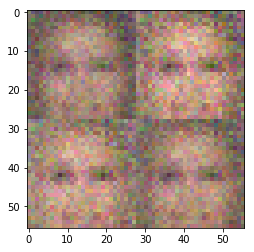

Epoch 0/1 -  Discriminator loss: 0.3458 -  Generator loss: 4.2054 -  D + G loss: 4.5512
Epoch 0/1 -  Discriminator loss: 0.3485 -  Generator loss: 4.6265 -  D + G loss: 4.9750
Epoch 0/1 -  Discriminator loss: 0.3442 -  Generator loss: 4.4688 -  D + G loss: 4.8130
Epoch 0/1 -  Discriminator loss: 0.3503 -  Generator loss: 4.2745 -  D + G loss: 4.6248
Epoch 0/1 -  Discriminator loss: 0.3410 -  Generator loss: 5.1100 -  D + G loss: 5.4510
Epoch 0/1 -  Discriminator loss: 0.3640 -  Generator loss: 3.6325 -  D + G loss: 3.9965
Epoch 0/1 -  Discriminator loss: 0.3555 -  Generator loss: 5.4562 -  D + G loss: 5.8118
Epoch 0/1 -  Discriminator loss: 0.3569 -  Generator loss: 3.8890 -  D + G loss: 4.2458
Epoch 0/1 -  Discriminator loss: 0.3448 -  Generator loss: 5.1027 -  D + G loss: 5.4475
Epoch 0/1 -  Discriminator loss: 0.3460 -  Generator loss: 4.4448 -  D + G loss: 4.7909
Epoch 0/1 -  Discriminator loss: 0.3452 -  Generator loss: 4.4498 -  D + G loss: 4.7950
Epoch 0/1 -  Discriminator loss:

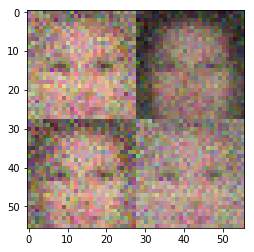

Epoch 0/1 -  Discriminator loss: 0.3663 -  Generator loss: 3.7119 -  D + G loss: 4.0782
Epoch 0/1 -  Discriminator loss: 0.3482 -  Generator loss: 5.6301 -  D + G loss: 5.9783
Epoch 0/1 -  Discriminator loss: 0.3421 -  Generator loss: 5.0671 -  D + G loss: 5.4092
Epoch 0/1 -  Discriminator loss: 0.3604 -  Generator loss: 3.7639 -  D + G loss: 4.1243
Epoch 0/1 -  Discriminator loss: 0.3425 -  Generator loss: 5.0354 -  D + G loss: 5.3780
Epoch 0/1 -  Discriminator loss: 0.3462 -  Generator loss: 5.0215 -  D + G loss: 5.3676
Epoch 0/1 -  Discriminator loss: 0.3490 -  Generator loss: 4.1469 -  D + G loss: 4.4959
Epoch 0/1 -  Discriminator loss: 0.3458 -  Generator loss: 4.4666 -  D + G loss: 4.8124
Epoch 0/1 -  Discriminator loss: 0.3449 -  Generator loss: 4.9196 -  D + G loss: 5.2645
Epoch 0/1 -  Discriminator loss: 0.3557 -  Generator loss: 4.2022 -  D + G loss: 4.5579
Epoch 0/1 -  Discriminator loss: 0.3591 -  Generator loss: 4.0342 -  D + G loss: 4.3933
Epoch 0/1 -  Discriminator loss:

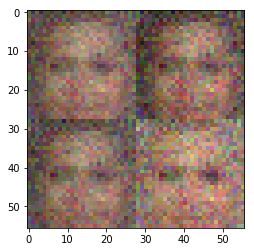

Epoch 0/1 -  Discriminator loss: 0.3516 -  Generator loss: 4.4019 -  D + G loss: 4.7535
Epoch 0/1 -  Discriminator loss: 0.3561 -  Generator loss: 4.5932 -  D + G loss: 4.9493
Epoch 0/1 -  Discriminator loss: 0.3548 -  Generator loss: 3.7955 -  D + G loss: 4.1503
Epoch 0/1 -  Discriminator loss: 0.3526 -  Generator loss: 4.2074 -  D + G loss: 4.5600
Epoch 0/1 -  Discriminator loss: 0.3549 -  Generator loss: 5.2589 -  D + G loss: 5.6138
Epoch 0/1 -  Discriminator loss: 0.3437 -  Generator loss: 4.5465 -  D + G loss: 4.8902
Epoch 0/1 -  Discriminator loss: 0.3582 -  Generator loss: 3.7215 -  D + G loss: 4.0797
Epoch 0/1 -  Discriminator loss: 0.3605 -  Generator loss: 4.7804 -  D + G loss: 5.1409
Epoch 0/1 -  Discriminator loss: 0.3631 -  Generator loss: 3.8694 -  D + G loss: 4.2325
Epoch 0/1 -  Discriminator loss: 0.3557 -  Generator loss: 4.3741 -  D + G loss: 4.7299
Epoch 0/1 -  Discriminator loss: 0.3697 -  Generator loss: 3.5056 -  D + G loss: 3.8753
Epoch 0/1 -  Discriminator loss:

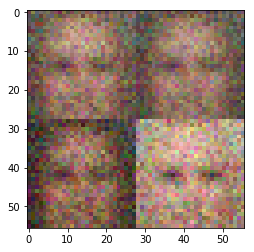

Epoch 0/1 -  Discriminator loss: 0.3564 -  Generator loss: 4.6041 -  D + G loss: 4.9605
Epoch 0/1 -  Discriminator loss: 0.3599 -  Generator loss: 3.8776 -  D + G loss: 4.2374
Epoch 0/1 -  Discriminator loss: 0.3623 -  Generator loss: 3.9554 -  D + G loss: 4.3177
Epoch 0/1 -  Discriminator loss: 0.3560 -  Generator loss: 4.3387 -  D + G loss: 4.6947
Epoch 0/1 -  Discriminator loss: 0.3562 -  Generator loss: 4.1406 -  D + G loss: 4.4968
Epoch 0/1 -  Discriminator loss: 0.3731 -  Generator loss: 3.4836 -  D + G loss: 3.8567
Epoch 0/1 -  Discriminator loss: 0.3628 -  Generator loss: 5.0945 -  D + G loss: 5.4573
Epoch 0/1 -  Discriminator loss: 0.3548 -  Generator loss: 4.1632 -  D + G loss: 4.5179
Epoch 0/1 -  Discriminator loss: 0.3514 -  Generator loss: 4.4090 -  D + G loss: 4.7605
Epoch 0/1 -  Discriminator loss: 0.3474 -  Generator loss: 4.3803 -  D + G loss: 4.7278
Epoch 0/1 -  Discriminator loss: 0.3576 -  Generator loss: 4.0237 -  D + G loss: 4.3813
Epoch 0/1 -  Discriminator loss:

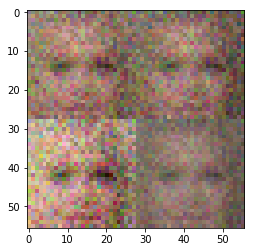

Epoch 0/1 -  Discriminator loss: 0.3637 -  Generator loss: 5.6463 -  D + G loss: 6.0101
Epoch 0/1 -  Discriminator loss: 0.3864 -  Generator loss: 3.3272 -  D + G loss: 3.7137
Epoch 0/1 -  Discriminator loss: 0.3945 -  Generator loss: 5.9882 -  D + G loss: 6.3828
Epoch 0/1 -  Discriminator loss: 0.3439 -  Generator loss: 4.5299 -  D + G loss: 4.8738
Epoch 0/1 -  Discriminator loss: 0.3514 -  Generator loss: 4.1932 -  D + G loss: 4.5446
Epoch 0/1 -  Discriminator loss: 0.3544 -  Generator loss: 4.4912 -  D + G loss: 4.8456
Epoch 0/1 -  Discriminator loss: 0.3433 -  Generator loss: 4.9653 -  D + G loss: 5.3085
Epoch 0/1 -  Discriminator loss: 0.3703 -  Generator loss: 3.6619 -  D + G loss: 4.0322
Epoch 0/1 -  Discriminator loss: 0.3809 -  Generator loss: 5.4380 -  D + G loss: 5.8189
Epoch 0/1 -  Discriminator loss: 0.3643 -  Generator loss: 3.6465 -  D + G loss: 4.0108
Epoch 0/1 -  Discriminator loss: 0.3499 -  Generator loss: 4.3929 -  D + G loss: 4.7428
Epoch 0/1 -  Discriminator loss:

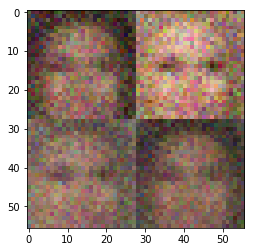

Epoch 0/1 -  Discriminator loss: 0.3472 -  Generator loss: 4.4786 -  D + G loss: 4.8258
Epoch 0/1 -  Discriminator loss: 0.3458 -  Generator loss: 4.7099 -  D + G loss: 5.0558
Epoch 0/1 -  Discriminator loss: 0.3481 -  Generator loss: 4.4063 -  D + G loss: 4.7544
Epoch 0/1 -  Discriminator loss: 0.3500 -  Generator loss: 4.2427 -  D + G loss: 4.5927
Epoch 0/1 -  Discriminator loss: 0.3477 -  Generator loss: 4.5608 -  D + G loss: 4.9085
Epoch 0/1 -  Discriminator loss: 0.3507 -  Generator loss: 4.8871 -  D + G loss: 5.2378
Epoch 0/1 -  Discriminator loss: 0.3550 -  Generator loss: 3.9749 -  D + G loss: 4.3298
Epoch 0/1 -  Discriminator loss: 0.3480 -  Generator loss: 4.4205 -  D + G loss: 4.7685
Epoch 0/1 -  Discriminator loss: 0.3492 -  Generator loss: 4.9523 -  D + G loss: 5.3015
Epoch 0/1 -  Discriminator loss: 0.3694 -  Generator loss: 3.5605 -  D + G loss: 3.9299
Epoch 0/1 -  Discriminator loss: 0.3553 -  Generator loss: 5.4555 -  D + G loss: 5.8107
Epoch 0/1 -  Discriminator loss:

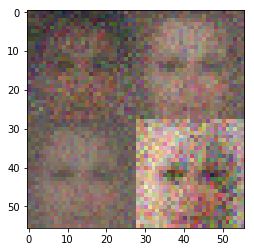

Epoch 0/1 -  Discriminator loss: 0.3608 -  Generator loss: 3.8967 -  D + G loss: 4.2575
Epoch 0/1 -  Discriminator loss: 0.3578 -  Generator loss: 4.6950 -  D + G loss: 5.0528
Epoch 0/1 -  Discriminator loss: 0.3763 -  Generator loss: 3.5563 -  D + G loss: 3.9326
Epoch 0/1 -  Discriminator loss: 0.3723 -  Generator loss: 5.0070 -  D + G loss: 5.3792
Epoch 0/1 -  Discriminator loss: 0.3488 -  Generator loss: 4.2642 -  D + G loss: 4.6130
Epoch 0/1 -  Discriminator loss: 0.3490 -  Generator loss: 4.4409 -  D + G loss: 4.7899
Epoch 0/1 -  Discriminator loss: 0.3567 -  Generator loss: 5.0139 -  D + G loss: 5.3706


KeyboardInterrupt: 

In [94]:
batch_size = 64
z_dim = 128
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.